In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
books=pd.read_csv("/content/drive/MyDrive/Files/Books.csv",error_bad_lines=False,encoding="latin-1")
books.columns=['ISBN','booktitle','bookAuthor','yearofpublication','publisher','imageUrlS','imageUrlM','imageUrlmL']
rating=pd.read_csv("/content/drive/MyDrive/Files/Ratings.csv",error_bad_lines=False,encoding="latin-1")
rating.columns=['userID','ISBN','bookRating']
users=pd.read_csv("/content/drive/MyDrive/Files/Users.csv",error_bad_lines=False,encoding="latin-1")
users.columns=["userID",'Location','Age']

#Books Data

In [ ]:
books.head()

,ISBN,booktitle,bookAuthor,yearofpublication,publisher,imageUrlS,imageUrlM,imageUrlmL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
books=books.replace('[^a-z A-Z]', '')
books.replace('\?', '',regex=True)
books.dropna(inplace=True)

In [ ]:
books.shape

(271354, 8)

In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271354 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ISBN               271354 non-null  object
 1   booktitle          271354 non-null  object
 2   bookAuthor         271354 non-null  object
 3   yearofpublication  271354 non-null  object
 4   publisher          271354 non-null  object
 5   imageUrlS          271354 non-null  object
 6   imageUrlM          271354 non-null  object
 7   imageUrlmL         271354 non-null  object
dtypes: object(8)
memory usage: 18.6+ MB


In [ ]:
books.describe()

,ISBN,booktitle,bookAuthor,yearofpublication,publisher,imageUrlS,imageUrlM,imageUrlmL
count,271354,271354,271354,271354,271354,271354,271354,271354
unique,271354,242130,102020,200,16803,271038,271038,271038
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/014062080X.0...,http://images.amazon.com/images/P/014062080X.0...,http://images.amazon.com/images/P/014062080X.0...
freq,1,27,632,13902,7535,2,2,2


In [ ]:
x=books.isnull().sum()
x[0]

0

In [ ]:
books.dropna(inplace=True)

In [ ]:
books.isnull().sum()

ISBN                 0
booktitle            0
bookAuthor           0
yearofpublication    0
publisher            0
imageUrlS            0
imageUrlM            0
imageUrlmL           0
dtype: int64

In [ ]:
len(books['booktitle'].unique())

242130

In [ ]:
len(books['bookAuthor'].unique())

102020

In [ ]:
len(books['publisher'].unique())

16803

In [ ]:
len(books['ISBN'].unique())

271354

In [ ]:
books.ISBN.duplicated().sum()

0

In [ ]:
books.drop(['imageUrlS','imageUrlM','imageUrlmL'],axis=1,inplace=True)

In [ ]:
books.columns

Index(['ISBN', 'booktitle', 'bookAuthor', 'yearofpublication', 'publisher'], dtype='object')

#Ratings Data

In [ ]:
rating.head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
print(rating.shape)
print(list(rating.columns))

(1149780, 3)
['userID', 'ISBN', 'bookRating']


In [ ]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   userID      1149780 non-null  int64 
 1   ISBN        1149780 non-null  object
 2   bookRating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [ ]:
rating.describe()

,userID,bookRating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [ ]:
rating.isnull().sum()

userID        0
ISBN          0
bookRating    0
dtype: int64

In [ ]:
rating.duplicated().sum()

0

In [ ]:
len(rating['userID'].unique())

105283

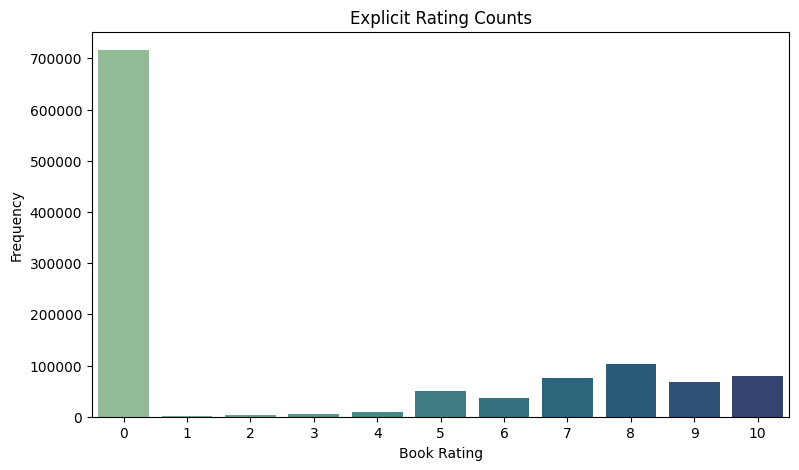

In [ ]:
plt.figure(figsize=(9, 5))
plt.title('Explicit Rating Counts')
sns.countplot(x = 'bookRating', data = rating, palette = 'crest')
plt.xlabel("Book Rating")
plt.ylabel("Frequency")
plt.show()

- This data shows the frequency of rating(grade) a user provided for the books.

- The data shows that most books are rated 0. The 0 rating does'nt always mean the books lack in some aspect but also that the books maybe left unrated.

- If we leave the rating '0' on x-axis the most popular rating chosen was 8. The ratings 1 and 2 are used rarely.

- This rating points that most books fall in the 'good' category.

- This data can be used to pinpoint what type or what book individualy is rated well(is popular). This data can be further grouped according to the features.

In [ ]:
rating = rating.loc[rating.bookRating != 0, :]
#rating_implicit = rating.loc[rating.bookRating == 0, :]
#print("Explicit Ratings data shape = " + str(rating_explicit.shape) + "\nImplicit Ratings data shape = " + str(rating_implicit.shape))

<Axes: title={'center': 'Explicit Rating Counts'}, xlabel='bookRating', ylabel='count'>

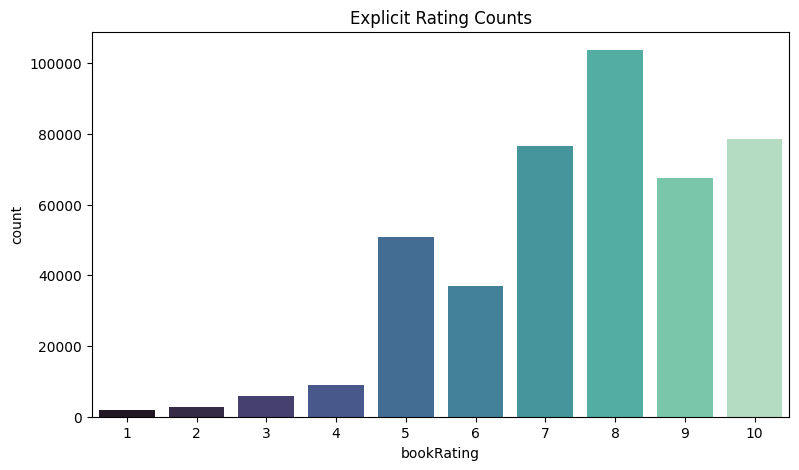

In [ ]:
plt.figure(figsize=(9, 5))
plt.title('Explicit Rating Counts')
sns.countplot(x = 'bookRating', data = rating,palette = 'mako')

- Same countplot as above just without the 0 rating.

#Users Data

In [ ]:
users.head()

,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
users=users.replace('[^a-zA-Z]', '')
users.replace('\?', '',regex=True)
users.dropna(inplace=True)

In [ ]:
print(users.shape)
print(list(users.columns))

(168096, 3)
['userID', 'Location', 'Age']


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168096 entries, 1 to 278854
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   userID    168096 non-null  int64  
 1   Location  168096 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.1+ MB


In [ ]:
users.describe()

,userID,Age
count,168096.000000,168096.000000
mean,139394.611865,34.751434
std,80561.659564,14.428097
min,2.000000,0.000000
25%,69914.750000,24.000000
50%,139363.500000,32.000000
75%,209162.500000,44.000000
max,278855.000000,244.000000


In [ ]:
len(users['userID'].unique())

168096

In [ ]:
users.isnull().sum()

userID      0
Location    0
Age         0
dtype: int64

In [ ]:
users['Age']=users['Age'].interpolate()

In [ ]:
users.dropna(inplace=True)
users.duplicated().sum()

0

In [ ]:
users.isna().sum()

userID      0
Location    0
Age         0
dtype: int64

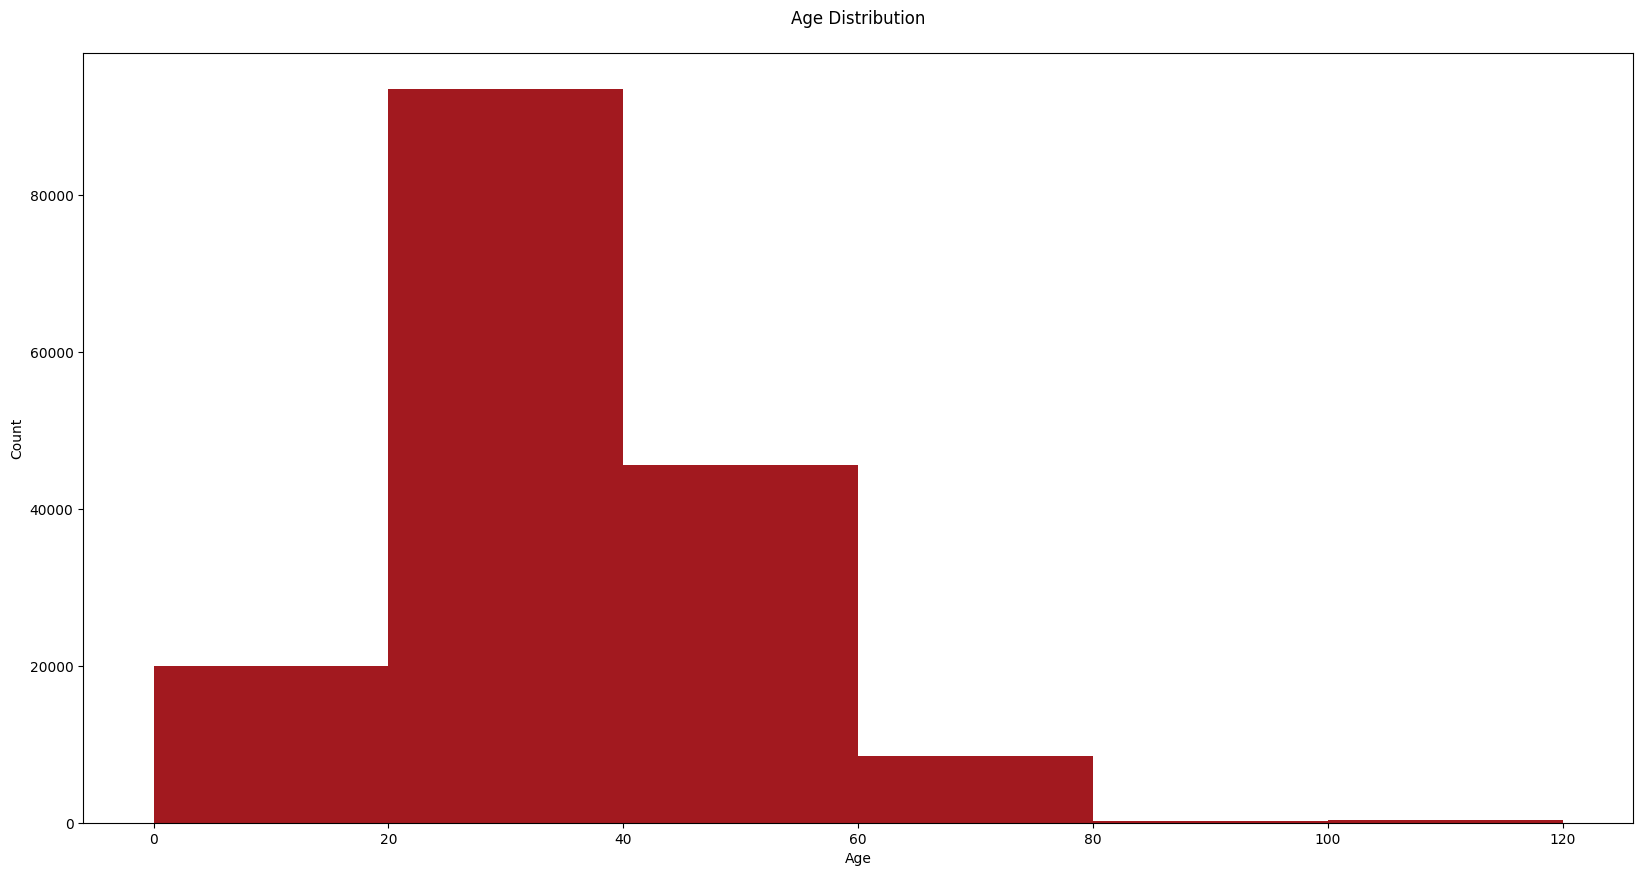

In [ ]:
colors=['#a2191f']
bins = [0,20,40,60,80,100,120]
plt.figure(figsize=(20,10))
plt.hist(users.Age,bins=bins,color=colors)
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('BuyerAge.png', bbox_inches='tight')
plt.show()

- The Plot above shows the frequency of books bought by buyers(Users) of various age groups. 

- The data shows that most books are bought by buyers of age group between 20 to 30 [approx.].

- The data can be futher used to pin point and target the type of books bought by the buyers. Or further group them according to the features in the datasets.

In [ ]:
rating.head()

,userID,ISBN,bookRating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
6,276736,3257224281,8
7,276737,0600570967,6


In [ ]:
df1 = pd.merge(books,rating,on='ISBN',how='left')
df1.dropna(inplace=True)
df1

,ISBN,booktitle,bookAuthor,yearofpublication,publisher,userID,bookRating
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8.0,5.0
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676.0,8.0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,67544.0,8.0
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,116866.0,9.0
5,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,123629.0,9.0
...,...,...,...,...,...,...,...
505346,0395264707,Dreamsnake,Vonda N. McIntyre,1978,Houghton Mifflin,275318.0,10.0
505352,1845170423,Cocktail Classics,David Biggs,2004,Connaught,275970.0,7.0
505354,0449906736,Flashpoints: Promise and Peril in a New World,Robin Wright,1993,Ballantine Books,276313.0,5.0
505355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),276463.0,7.0


In [ ]:
n = 10
Books_name = df1['booktitle'].value_counts()[:n].index.tolist()
Books_name
Books_count = df1['booktitle'].value_counts()[:n].tolist()
Books_count

Books_df = pd.DataFrame(Books_name,columns=['BookTitle'])
Books_df['Sales'] = Books_count
Books_df

,BookTitle,Sales
0,The Lovely Bones: A Novel,707
1,Wild Animus,581
2,The Da Vinci Code,494
3,The Secret Life of Bees,406
4,The Nanny Diaries: A Novel,393
5,The Red Tent (Bestselling Backlist),383
6,Bridget Jones's Diary,377
7,A Painted House,366
8,Life of Pi,336
9,Harry Potter and the Chamber of Secrets (Book 2),326


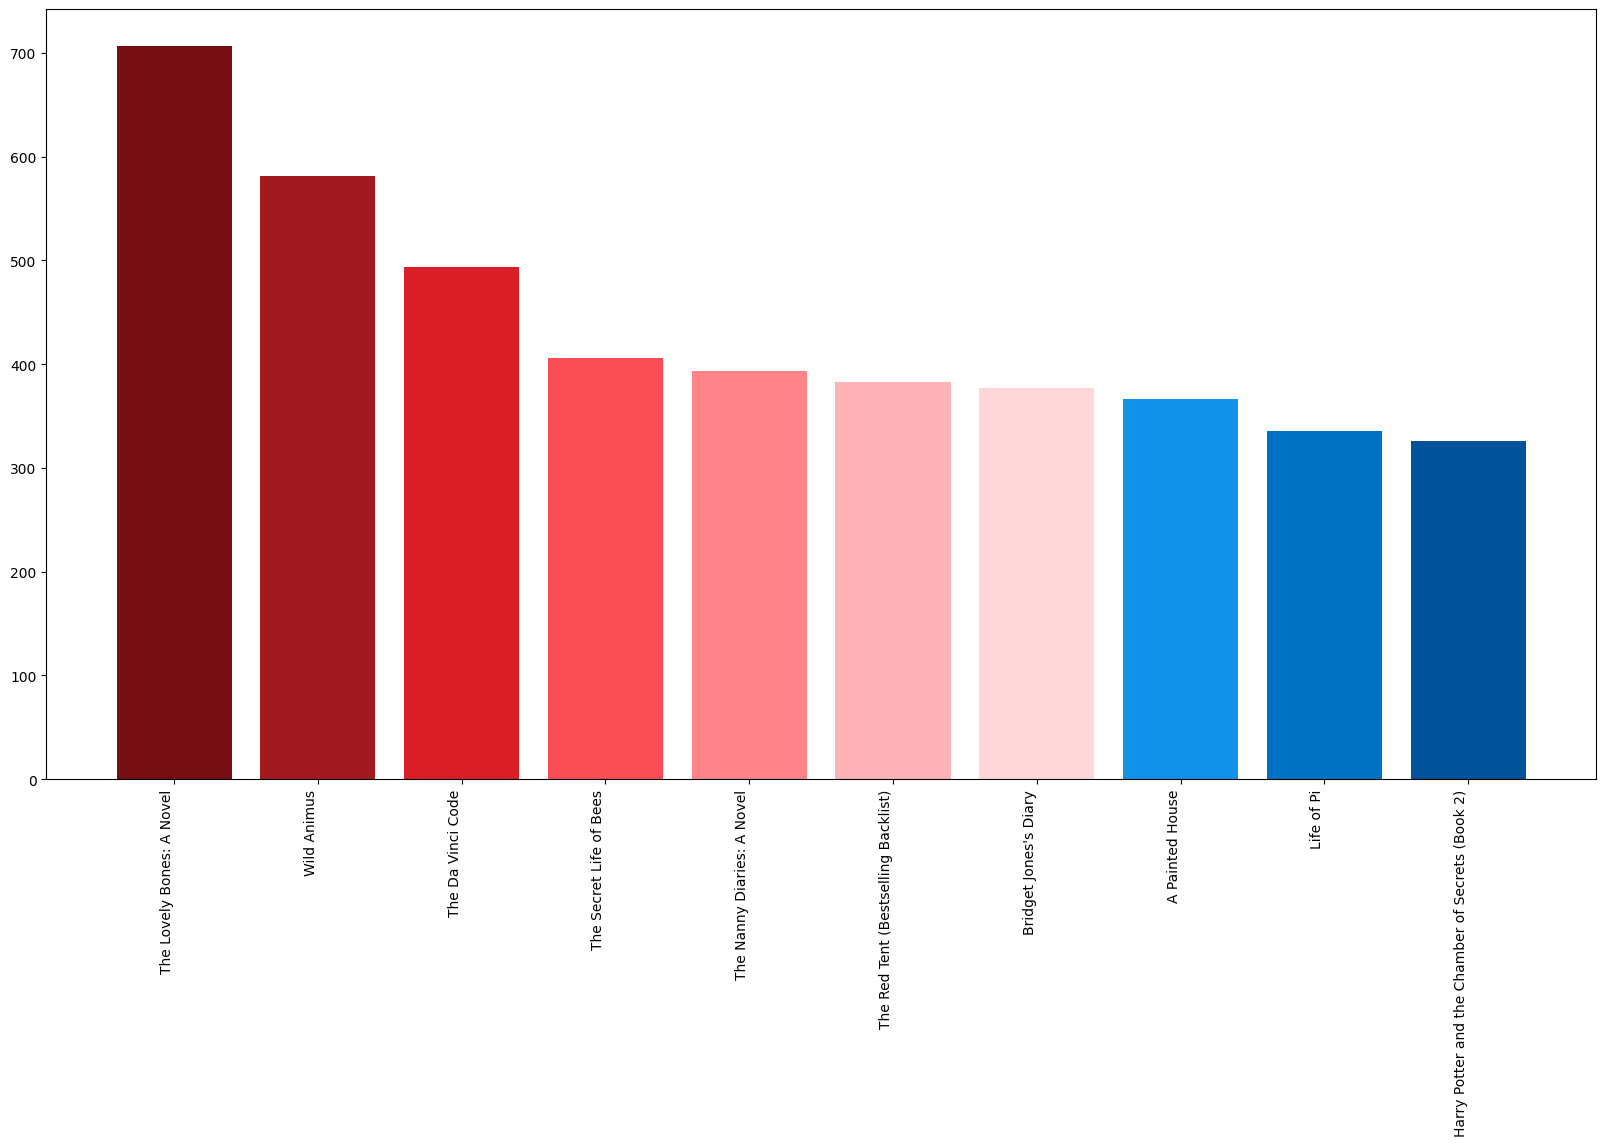

In [ ]:
c=['#750e13','#a2191f','#da1e28',"#fa4d56",'#ff8389','#ffb3b8','#ffd7d9','#1192e8','#0072c3','#00539a']
x = Books_name
h = Books_count

ax = plt.subplot()
plt.bar(x,height=h,color=c)
plt.setp(ax.get_xticklabels(), rotation=90, ha='right')
plt.rcParams['figure.figsize'] = [20, 10]
plt.savefig('PopularBooks.png', bbox_inches='tight')
plt.show()

- The plot shows the top 10 books in terms of sales.

- The plot shows that The Lovely Bones: A Novel is most popular in terms of Sales.

- This data is useful to sort the popular titles in terms of sales. And can be futher used for comparision with the local populars. (Books that are popular in specific regions, Countries and cities.)

In [ ]:
top_int_books = df1.iloc[:,[1,6]].groupby('booktitle')['bookRating'].mean()
top_int_books = pd.DataFrame(top_int_books)

In [ ]:
#
#
#top_int_books.sort_values(by='')
#
#
##
#
#
#
#

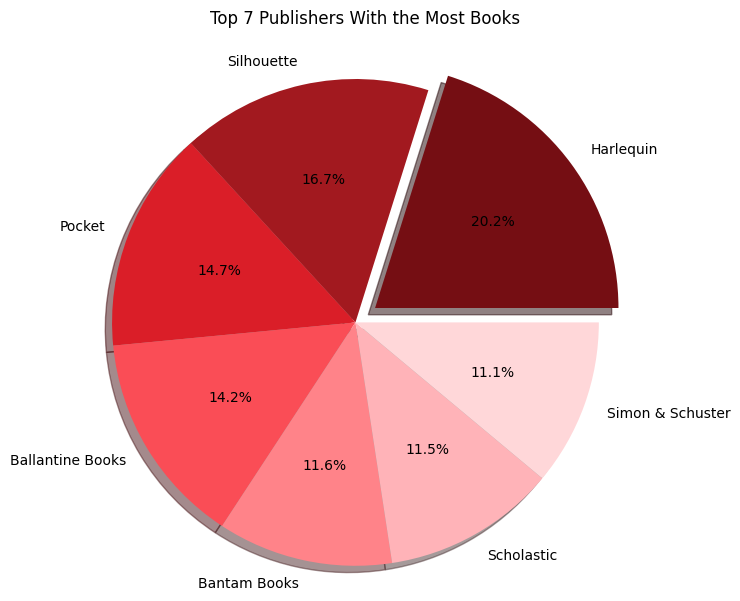

In [ ]:
my_dict=(df1['publisher'].value_counts()).to_dict()
count= pd.DataFrame(list(my_dict.items()),columns = ['c','count'])
a = count.sort_values(by=['count'], ascending = False)
a.head(7)
labels = 'Harlequin','Silhouette','Pocket','Ballantine Books','Bantam Books','Scholastic','Simon & Schuster'
sizes = [count['count'].iloc[0],count['count'].iloc[1],count['count'].iloc[2],count['count'].iloc[3],count['count'].iloc[4],
         count['count'].iloc[5],count['count'].iloc[6]]
explode = (0.1, 0, 0, 0,0, 0,0 )
fig1 , ax1 = plt.subplots(figsize=(7,7))
ax1.pie(sizes,
        explode = explode,
        labels = labels,
        colors=c,
        autopct = '%1.1f%%',
        shadow = True,
        startangle = 0)
plt.title("Top 7 Publishers With the Most Books",pad=20)
ax1.axis ('equal')
plt.savefig('TopPublishers.png', bbox_inches='tight')
plt.show()

- This pie chart shows the publishers who published most number of books in form of percentage.

- The chart shows Harlequin has the highest percentage in number of books published.

- If a user prefers certain publisher then this data can be useful.

In [ ]:
np.set_printoptions(threshold=np.inf)#which is commonly used for numerical computing
df1['yearofpublication'].unique()

array([2001, 1991, 1999, 2000, 1993, 2002, 1988, 2004, 1998, 1994, 2003,
       1997, 1996, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980, 1983,
       1987, 1990, 1981, 1984, 0, 1968, 1961, 1989, 1958, 1976, 1975,
       1965, 1977, 1941, 1970, 1974, 1962, 1971, 1973, 1972, 1960, 1966,
       1920, 1956, 1959, 1953, 1942, 1963, 1964, 1969, 1954, 1950, 1967,
       2005, 1957, 1952, 1940, 1937, 1955, 1946, 1936, 1930, 1925, 1948,
       1951, 1947, 1945, 1943, 1923, 2020, 1939, 1926, 1938, 2030, 1911,
       1904, 1949, 1932, 1928, 1929, 1927, 1931, 2050, 1934, 1902, 2038,
       2026, 1944, 1901, 2010, 1908, 1906, 1933, 1935, 1806, 2021, '2000',
       '2003', '2002', '1989', '1976', '1999', '1977', '1998', '1992',
       '1982', '1990', '1981', '1986', '1995', '1997', '2001', '1996',
       '0', '1994', '2004', '1968', '1987', '1984', '1988', '1991',
       '1983', '1993', '1970', '1978', '1973', '1980', '1979', '1961',
       '1939', '1985', '1966', '1958', '1971', '1969', '1974', 

In [ ]:
df1.drop(df1.loc[df1['yearofpublication']==0].index,inplace=True)
df1['yearofpublication'].unique()

array([2001, 1991, 1999, 2000, 1993, 2002, 1988, 2004, 1998, 1994, 2003,
       1997, 1996, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980, 1983,
       1987, 1990, 1981, 1984, 1968, 1961, 1989, 1958, 1976, 1975, 1965,
       1977, 1941, 1970, 1974, 1962, 1971, 1973, 1972, 1960, 1966, 1920,
       1956, 1959, 1953, 1942, 1963, 1964, 1969, 1954, 1950, 1967, 2005,
       1957, 1952, 1940, 1937, 1955, 1946, 1936, 1930, 1925, 1948, 1951,
       1947, 1945, 1943, 1923, 2020, 1939, 1926, 1938, 2030, 1911, 1904,
       1949, 1932, 1928, 1929, 1927, 1931, 2050, 1934, 1902, 2038, 2026,
       1944, 1901, 2010, 1908, 1906, 1933, 1935, 1806, 2021, '2000',
       '2003', '2002', '1989', '1976', '1999', '1977', '1998', '1992',
       '1982', '1990', '1981', '1986', '1995', '1997', '2001', '1996',
       '0', '1994', '2004', '1968', '1987', '1984', '1988', '1991',
       '1983', '1993', '1970', '1978', '1973', '1980', '1979', '1961',
       '1939', '1985', '1966', '1958', '1971', '1969', '1974', '19

In [ ]:
index=df1.loc[df1['yearofpublication']=='DK Publishing Inc'].index
df1.drop(index,inplace=True)
index=df1.loc[df1['yearofpublication']=='Gallimard'].index
df1.drop(index,inplace=True)
df1['yearofpublication'].replace({'0':df1['yearofpublication'].value_counts().idxmax()},inplace=True)
df1['yearofpublication'] = df1['yearofpublication'].astype(str).astype(int)
df1['yearofpublication'].unique()

array([2001, 1991, 1999, 2000, 1993, 2002, 1988, 2004, 1998, 1994, 2003,
       1997, 1996, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980, 1983,
       1987, 1990, 1981, 1984, 1968, 1961, 1989, 1958, 1976, 1975, 1965,
       1977, 1941, 1970, 1974, 1962, 1971, 1973, 1972, 1960, 1966, 1920,
       1956, 1959, 1953, 1942, 1963, 1964, 1969, 1954, 1950, 1967, 2005,
       1957, 1952, 1940, 1937, 1955, 1946, 1936, 1930, 1925, 1948, 1951,
       1947, 1945, 1943, 1923, 2020, 1939, 1926, 1938, 2030, 1911, 1904,
       1949, 1932, 1928, 1929, 1927, 1931, 2050, 1934, 1902, 2038, 2026,
       1944, 1901, 2010, 1908, 1906, 1933, 1935, 1806, 2021, 1924, 2006,
       1900, 1378, 2011, 1376, 2037])

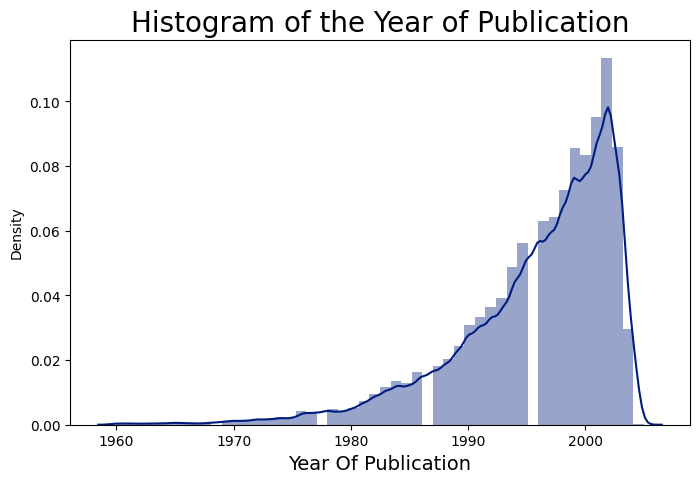

In [ ]:
fig=plt.figure(figsize=(8,5))
y1 = df1[df1['yearofpublication'] >= 1960]
y1 = y1[y1['yearofpublication'] <= 2005]
sns.set_palette("dark")
sns.distplot(y1['yearofpublication'])

plt.xlabel('Year Of Publication',size=14)
plt.title('Histogram of the Year of Publication',size=20)
plt.show()

- This chart shows the frequency of books published in a decade.

- We can see the highest frequency around the decade of 2000.

- This data can be useful if a user prefers books from certain time period or if a certain gerne belongs to a certain time period (for example say the Shakespherian literature).

In [ ]:
print(users.shape)
users.columns=['UserID','Location','Age']
users.head()

(168096, 3)


,UserID,Location,Age
1,2,"stockton, california, usa",18.0
3,4,"porto, v.n.gaia, portugal",17.0
5,6,"santa monica, california, usa",61.0
9,10,"albacete, wisconsin, spain",26.0
10,11,"melbourne, victoria, australia",14.0


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168096 entries, 1 to 278854
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   UserID    168096 non-null  int64  
 1   Location  168096 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.1+ MB


In [ ]:
users[['city','state','country','nan','nan','nan','nan','nan','nan']]=users['Location'].apply(lambda x: pd.Series(str(x).split(",")))
users.drop(['Location','nan'],axis=1,inplace=True)
users

# Seperating location column into city, state and country

,UserID,Age,city,state,country
1,2,18.0,stockton,california,usa
3,4,17.0,porto,v.n.gaia,portugal
5,6,61.0,santa monica,california,usa
9,10,26.0,albacete,wisconsin,spain
10,11,14.0,melbourne,victoria,australia
...,...,...,...,...,...
278848,278849,23.0,georgetown,ontario,canada
278850,278851,33.0,dallas,texas,usa
278851,278852,32.0,brisbane,queensland,australia
278852,278853,17.0,stranraer,n/a,united kingdom


In [ ]:
users = users[users.state !=' n/a']
users = users[users.state !=' ']
users = users[users.city !=' n/a']
users = users[users.city !=' ']
users = users[users.country !=' n/a']
users = users[users.country !=' ']
users = users[users.Age <=100]

users

,UserID,Age,city,state,country
1,2,18.0,stockton,california,usa
3,4,17.0,porto,v.n.gaia,portugal
5,6,61.0,santa monica,california,usa
9,10,26.0,albacete,wisconsin,spain
10,11,14.0,melbourne,victoria,australia
...,...,...,...,...,...
278845,278846,23.0,toronto,ontario,canada
278848,278849,23.0,georgetown,ontario,canada
278850,278851,33.0,dallas,texas,usa
278851,278852,32.0,brisbane,queensland,australia


In [ ]:
print(rating.shape)
rating.columns=['UserID','ISBN','Rating']
rating.head()

(433671, 3)


,UserID,ISBN,Rating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
6,276736,3257224281,8
7,276737,0600570967,6


In [ ]:
rating['Rating'].unique()

array([ 5,  3,  6,  8,  7, 10,  9,  4,  1,  2])

In [ ]:
rating['Rating'].unique().sum()

55

In [ ]:
filter1 = rating[rating["UserID"].isin(users["UserID"])] 
df_ratings=filter1[filter1["ISBN"].isin(books["ISBN"])] 
df=pd.merge(users,df_ratings,on='UserID')
df

,UserID,Age,city,state,country,ISBN,Rating
0,42,17.0,appleton,wisconsin,usa,0553582747,7
1,44,51.0,black mountain,north carolina,usa,0440223571,8
2,51,34.0,renton,washington,usa,0440225701,9
3,56,24.0,cheyenne,wyoming,usa,0671623249,7
4,56,24.0,cheyenne,wyoming,usa,0679865691,9
...,...,...,...,...,...,...,...
261340,278851,33.0,dallas,texas,usa,0914511211,8
261341,278851,33.0,dallas,texas,usa,1558531025,8
261342,278851,33.0,dallas,texas,usa,1569661057,10
261343,278851,33.0,dallas,texas,usa,1885071213,7


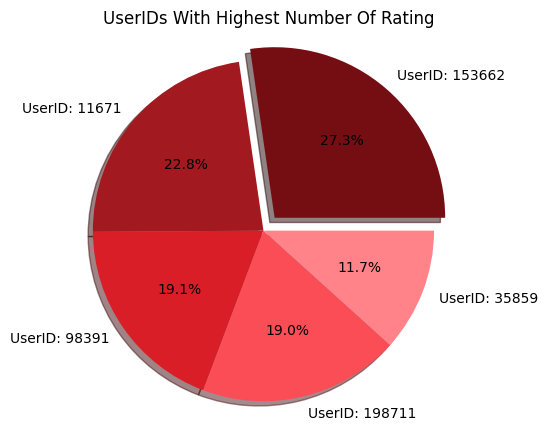

In [ ]:
my_dict=(df_ratings['Rating'].value_counts()).to_dict()
count= pd.DataFrame(list(my_dict.items()),columns = ['c','count'])
a = count.sort_values(by=['count'], ascending = False)
a.head(7)
labels = 'UserID: 153662','UserID: 11671','UserID: 98391','UserID: 198711','UserID: 35859'
sizes = [count['count'].iloc[0],count['count'].iloc[1],count['count'].iloc[2],count['count'].iloc[3],count['count'].iloc[4]]
explode = (0.1, 0, 0, 0,0)

fig1 , ax1 = plt.subplots(figsize=(5,5))

ax1.pie(sizes,
        explode = explode,
        labels = labels,
        colors=c,
        autopct = '%1.1f%%',
        shadow = True,
        startangle = 0)
plt.title("UserIDs With Highest Number Of Rating")
ax1.axis ('equal')
plt.savefig('TopUsers.png', bbox_inches='tight')
plt.show()

- This chart shows the userID's with most number of ratings in form of percentage. 

- This data shows the userID 153662 has the most percentage of ratings i.e. 27.4%

- This data shows the most active users and this data can be further used to suggest books to passive or similar users.

<Axes: >

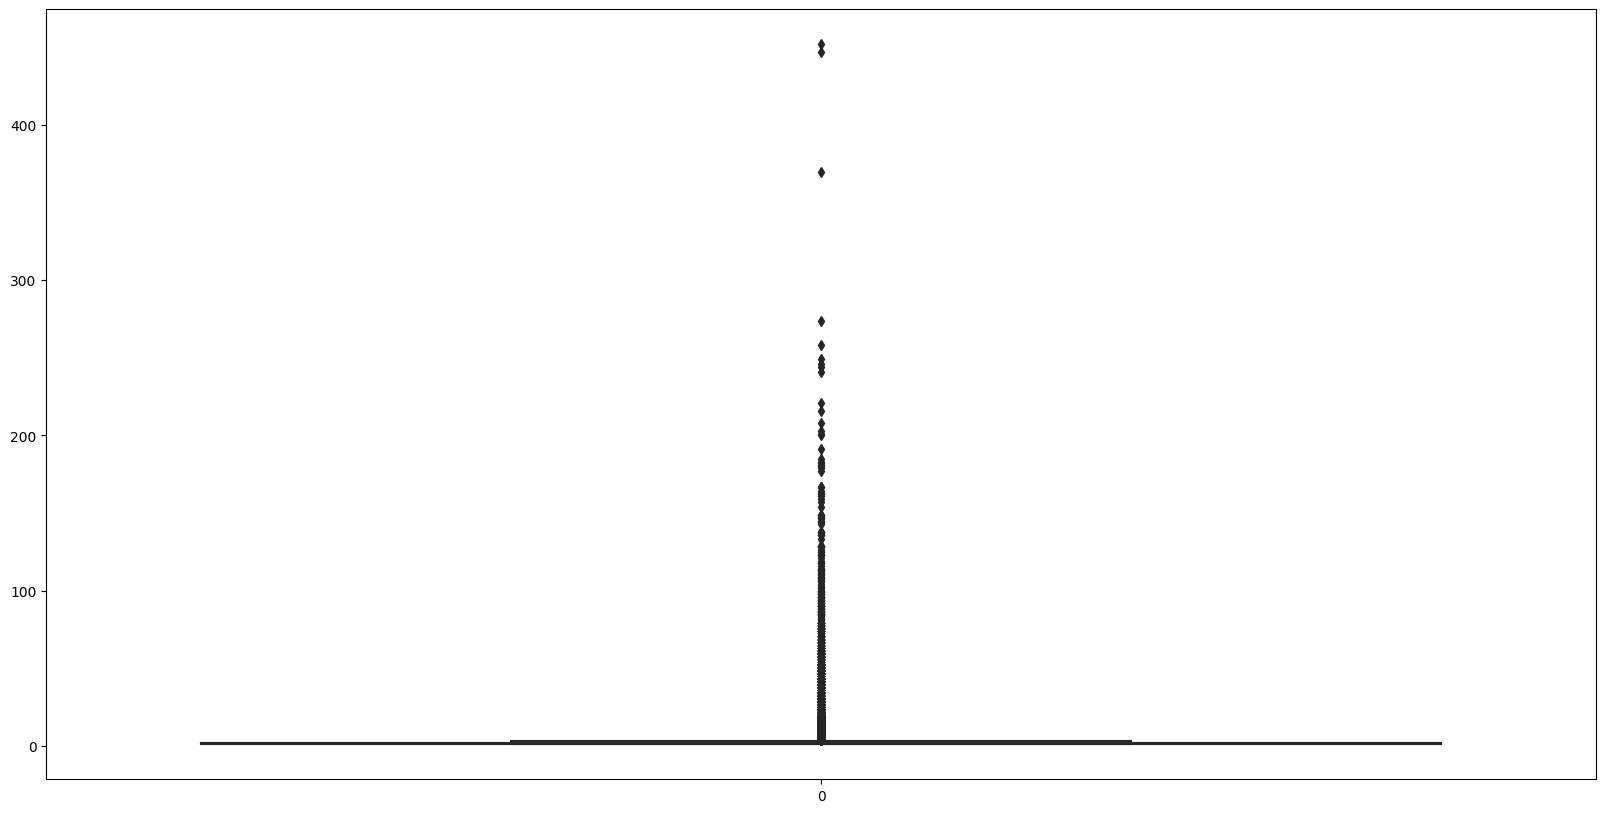

In [ ]:
df2_mrg = pd.merge(books,df,on='ISBN',how='left')
df2_mrg=df2_mrg.dropna()
a=df2_mrg['booktitle'].value_counts()
sns.boxplot(a)

# Grouped and Visualized by Age

In [ ]:
df2_mrg.replace(to_replace="Angels &amp; Demons",
           value="Angels & Demons",inplace=True)
df2_mrg.to_csv("Data_Clean1.csv",encoding='utf-8',index="False")
df2_mrg.loc[df2_mrg['booktitle']=='Angels &amp; Demons']

,ISBN,booktitle,bookAuthor,yearofpublication,publisher,UserID,Age,city,state,country,Rating


In [ ]:
data_Age = df2_mrg.loc[df2_mrg['Age']<=12]
data_Age

,ISBN,booktitle,bookAuthor,yearofpublication,publisher,UserID,Age,city,state,country,Rating
503,0971880107,Wild Animus,Rich Shapero,2004,Too Far,197792.0,7.0,canberra,australian capital territory,australia,3.0
685,0345402871,Airframe,Michael Crichton,1997,Ballantine Books,255189.0,0.0,sulz,baden-wuerttemberg,germany,8.0
711,0345417623,Timeline,MICHAEL CRICHTON,2000,Ballantine Books,45954.0,0.0,minneapolis,minnesota,usa,8.0
861,0446310786,To Kill a Mockingbird,Harper Lee,1988,Little Brown &amp; Company,81138.0,0.0,charlottetown,prince edward island,canada,7.0
1027,0449005615,Seabiscuit: An American Legend,LAURA HILLENBRAND,2002,Ballantine Books,208510.0,12.0,las vegas,nevada,usa,10.0
...,...,...,...,...,...,...,...,...,...,...,...
414274,0689826478,Tobys Alphabet Walk (Toby),Cyndy Szekeres,2000,Little Simon,243141.0,7.0,zeeland,michigan,usa,5.0
415062,0670626511,"The sea, the sea",Iris Murdoch,1978,Viking Press,259626.0,2.0,austin,texas,usa,6.0
415279,0553211994,The Jungle Books and Just So Stories,Kipling Rudyard,1986,Bantam Classics,269566.0,9.0,seattle,washington,usa,8.0
415286,0843101083,"Off-The-Wall (Mad Libs, No. 6)",Roger Price,1970,Price Stern Sloan,269566.0,9.0,seattle,washington,usa,6.0


In [ ]:
data_age1_count = data_Age['booktitle'].value_counts()[:5].tolist()
data_age1_count
data_age1_name = data_Age['booktitle'].value_counts()[:5].index.tolist()
data_age1_name

["Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))",
 'Harry Potter and the Chamber of Secrets (Book 2)',
 'The Bad Beginning (A Series of Unfortunate Events, Book 1)',
 'Bears on Wheels (Bright &amp; Early Books)',
 'The Magic School Bus Lost in the Solar System (Magic School Bus (Paperback))']

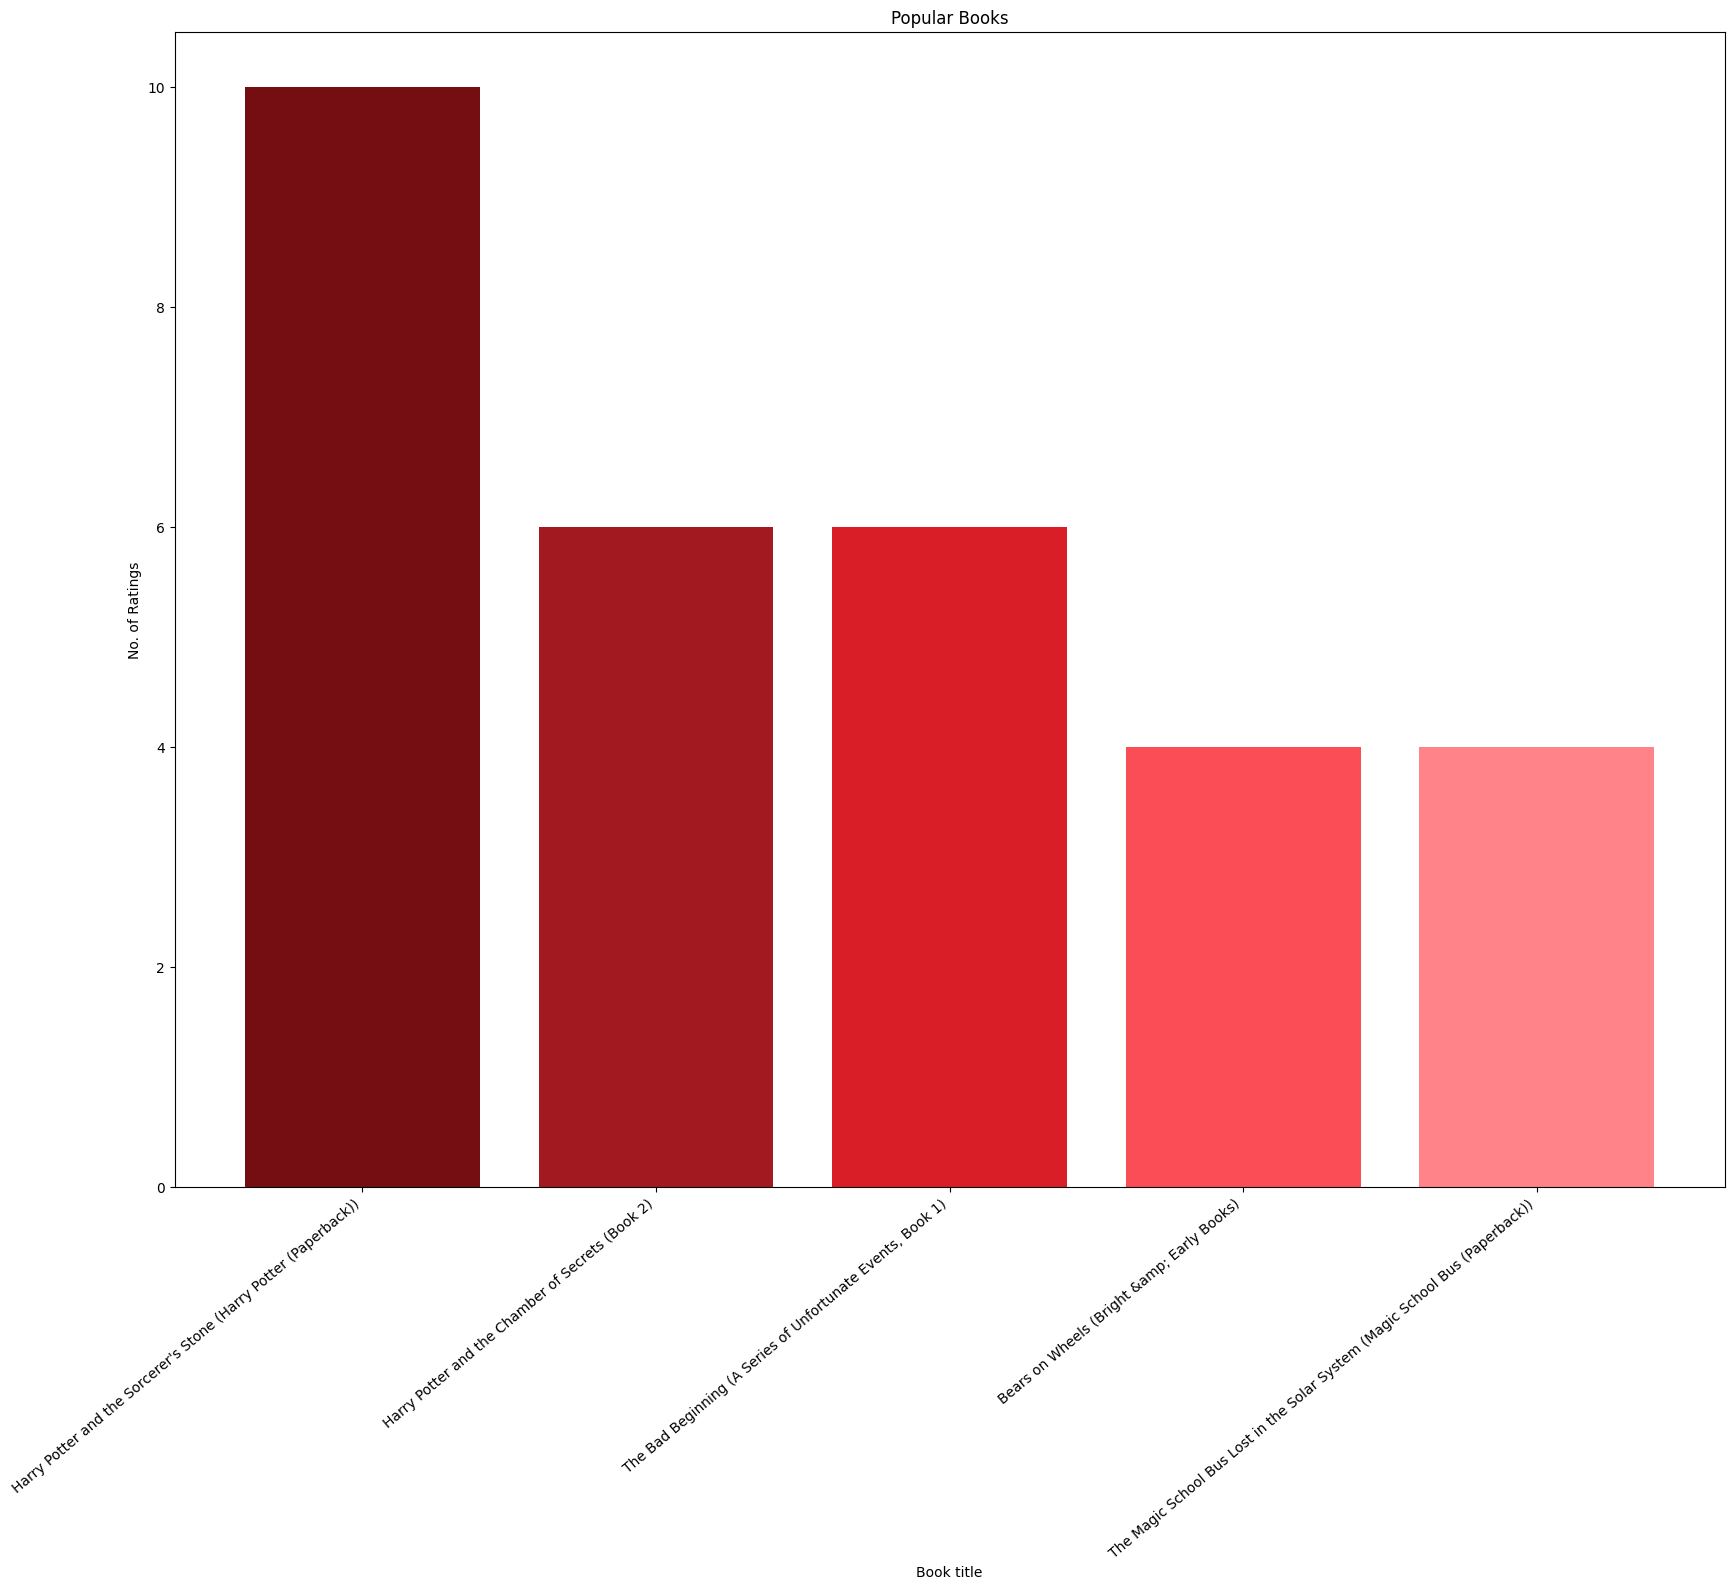

In [ ]:
h=data_age1_count
x=data_age1_name

ax = plt.subplot()
plt.bar(x,height=h,color=c)
plt.title('Popular Books')
plt.xlabel('Book title')
plt.ylabel('No. of Ratings')
plt.setp(ax.get_xticklabels(), rotation=90, ha='right')
plt.rcParams['figure.figsize'] = [20, 15]
#plt.savefig('PopularBooksUsa.png', bbox_inches='tight')
plt.show()

- The plot shows the top 10 books in terms of popularity for age group less than 12.

- The plot shows that 'Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))' is most popular in terms of popularity.

- This data is useful to sort the popular titles in terms of popularity amongst kids(Age<=12). And can be futher used for comparision with the local populars for kids. (Books that are popular in specific regions, Countries and cities.)

In [ ]:
data_Age = df2_mrg.loc[(df2_mrg.Age >=13)&(df2_mrg.Age <=18)]
data_Age

,ISBN,booktitle,bookAuthor,yearofpublication,publisher,UserID,Age,city,state,country,Rating
54,0440234743,The Testament,John Grisham,1999,Dell,70666.0,18.0,warwick,rhode island,usa,7.0
56,0440234743,The Testament,John Grisham,1999,Dell,75691.0,17.0,cincinnati,ohio,usa,9.0
65,0440234743,The Testament,John Grisham,1999,Dell,108143.0,17.0,cincinnati,ohio,usa,9.0
78,0440234743,The Testament,John Grisham,1999,Dell,144062.0,16.0,stow,massachusetts,usa,10.0
184,0609804618,Our Dumb Century: The Onion Presents 100 Years...,The Onion,1999,Three Rivers Press,206202.0,16.0,arlington heights,illinois,usa,10.0
...,...,...,...,...,...,...,...,...,...,...,...
414695,0679732535,Pick-Up (Vintage Crime/Black Lizard),Charles Ray Willeford,1990,Vintage Books USA,244804.0,17.0,palmyra,nebraska,usa,10.0
414872,0152049266,The Window,Jeanette Ingold,2003,Harcourt Paperbacks,245444.0,18.0,linclon,nebraska,usa,8.0
415238,0738702315,Llewellyn's Witchy Day Planner 2004 Calendar,Ellen Dugan,2003,Llewellyn Publications,269009.0,16.0,weston-super-mare,england,united kingdom,4.0
415239,0806524103,"The Teen Book of Shadows: Star Signs, Spells, ...",Patricia Telesco,2004,Citadel Press,269009.0,16.0,weston-super-mare,england,united kingdom,6.0


In [ ]:
data_age1_count = data_Age['booktitle'].value_counts()[:5].tolist()
data_age1_count
data_age1_name = data_Age['booktitle'].value_counts()[:5].index.tolist()
data_age1_name

['Wild Animus',
 'To Kill a Mockingbird',
 'Harry Potter and the Chamber of Secrets (Book 2)',
 'Harry Potter and the Prisoner of Azkaban (Book 3)',
 'Harry Potter and the Goblet of Fire (Book 4)']

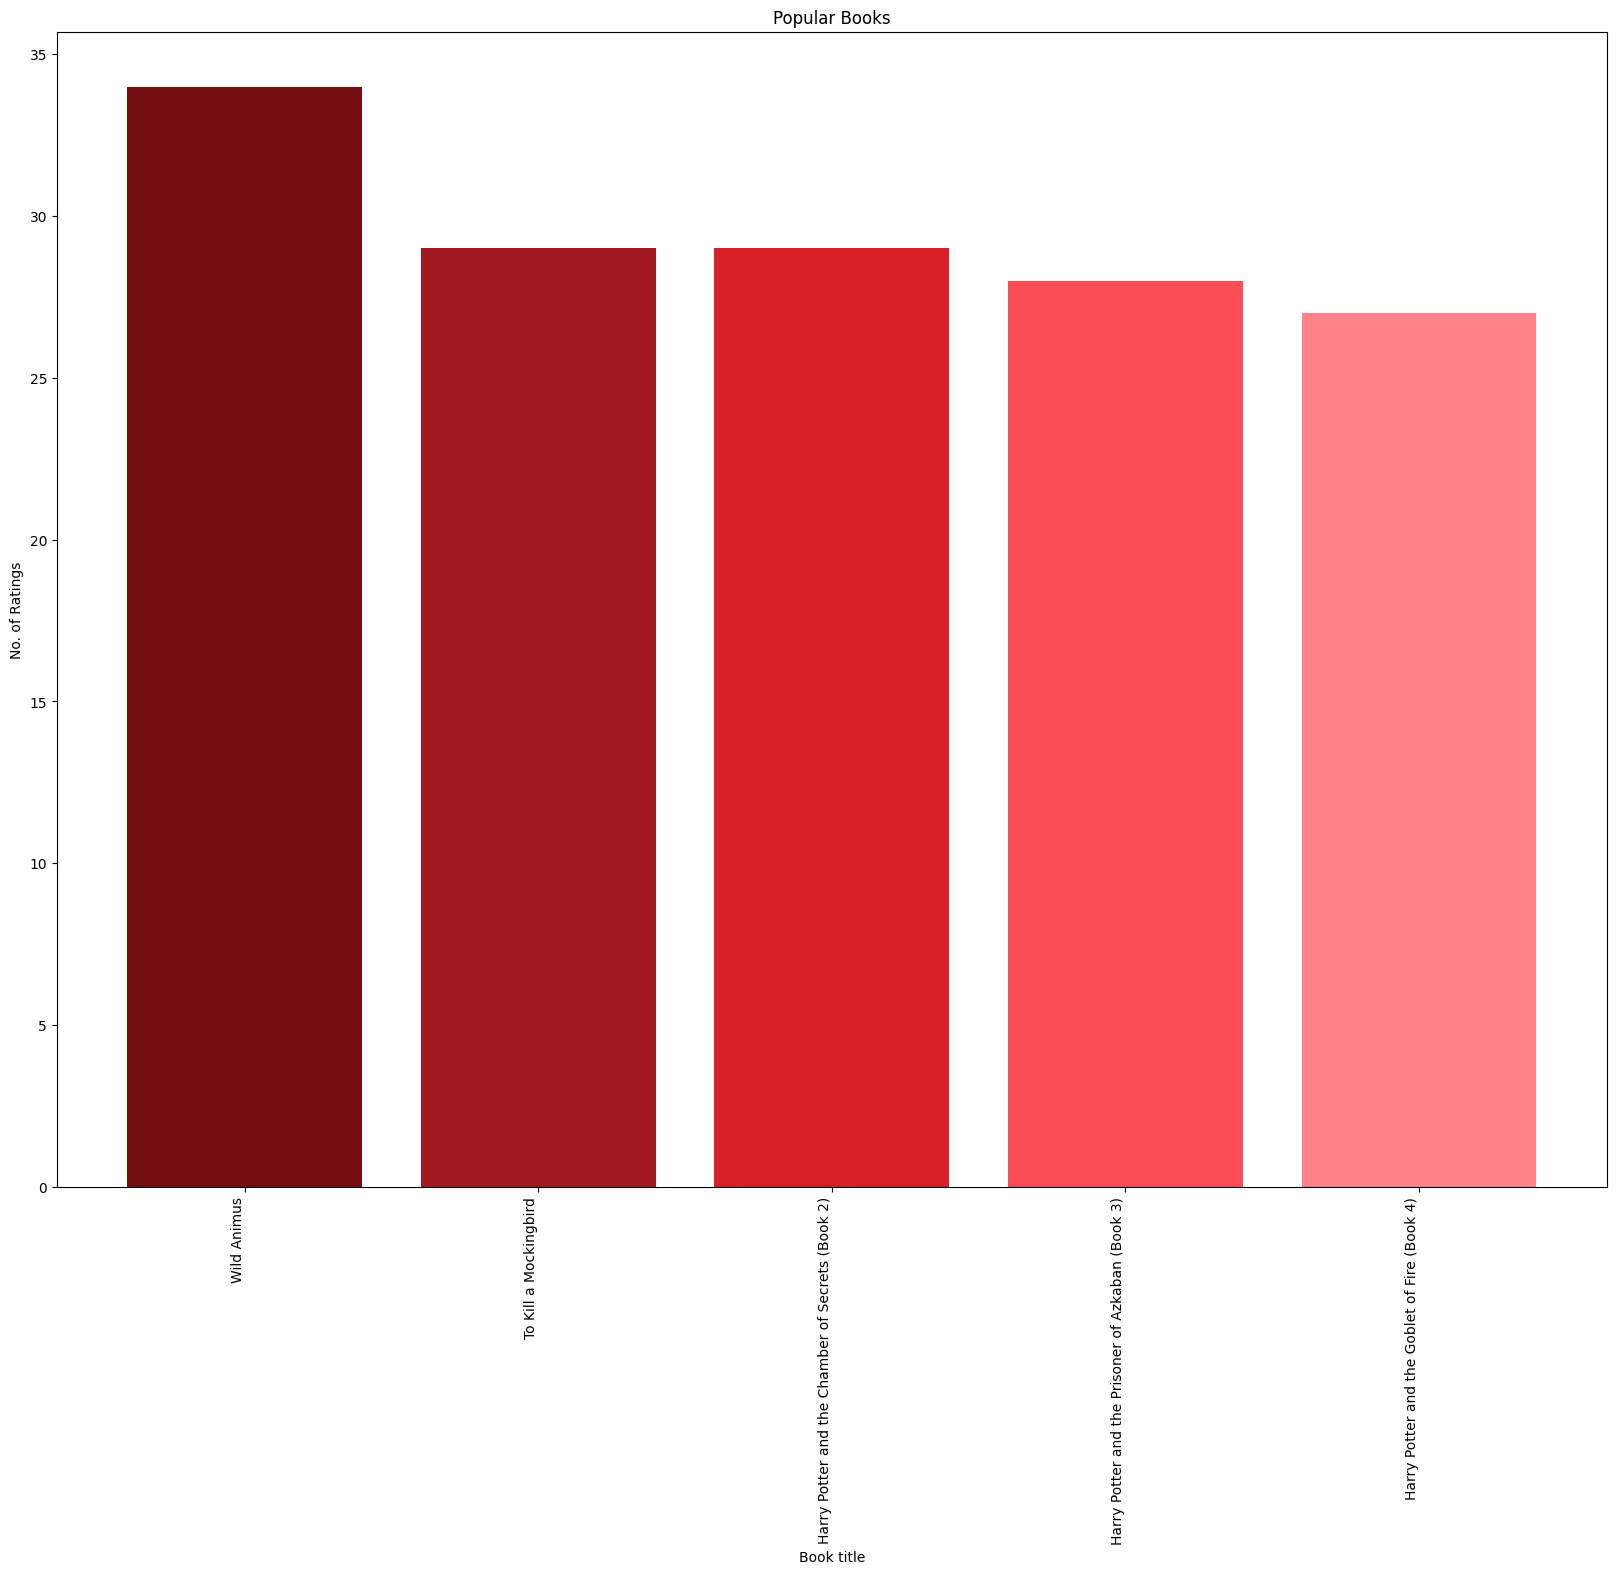

In [ ]:
h=data_age1_count
x=data_age1_name

ax = plt.subplot()
plt.bar(x,height=h,color=c)
plt.title('Popular Books')
plt.xlabel('Book title')
plt.ylabel('No. of Ratings')
plt.setp(ax.get_xticklabels(), rotation=90, ha='right')
plt.rcParams['figure.figsize'] = [20, 15]
#plt.savefig('PopularBooksUsa.png', bbox_inches='tight')
plt.show()

- The plot shows the top 10 books in terms of popularity for age group between 13 to 18 (teenagers).

- The plot shows that 'Wild Animus' is most popular in terms of popularity.

- This data is useful to sort the popular titles in terms of popularity amongst teenagers. And can be futher used for comparision with the local populars for teenagers. (Books that are popular in specific regions, Countries and cities.)

In [ ]:
data_Age = df2_mrg.loc[(df2_mrg.Age >=18)&(df2_mrg.Age <=39)]
data_Age

,ISBN,booktitle,bookAuthor,yearofpublication,publisher,UserID,Age,city,state,country,Rating
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,67544.0,30.0,toronto,ontario,canada,8.0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,263325.0,27.0,fredericton,new brunswick,canada,6.0
7,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,110912.0,36.0,milpitas,california,usa,10.0
8,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,157969.0,30.0,denver,colorado,usa,8.0
12,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,29526.0,26.0,knoxville,tennessee,usa,9.0
...,...,...,...,...,...,...,...,...,...,...,...
415318,3525335423,Das Deutsche Kaiserreich 1871-1918.,Hans-Ulrich Wehler,1994,Vandenhoeck &amp; Ruprecht,274220.0,28.0,halle,sachsen-anhalt,germany,8.0
415319,3548740146,Wicca. Eine EinfÃ?Â¼hrung in weiÃ?Â?e Magie.,Scott Cunningham,2001,"Ullstein TB-Vlg., B.",274220.0,28.0,halle,sachsen-anhalt,germany,6.0
415320,381440176X,"Ein Fall fÃ?Â¼r TKKG, Bd.50, Sklaven fÃ?Â¼r Wu...",Stefan Wolf,1989,Pelikan,274220.0,28.0,halle,sachsen-anhalt,germany,8.0
415339,0449906736,Flashpoints: Promise and Peril in a New World,Robin Wright,1993,Ballantine Books,276313.0,36.0,livermore,california,usa,5.0


In [ ]:
data_age1_count = data_Age['booktitle'].value_counts()[:5].tolist()
data_age1_count
data_age1_name = data_Age['booktitle'].value_counts()[:5].index.tolist()
data_age1_name

['The Lovely Bones: A Novel',
 'Wild Animus',
 'The Da Vinci Code',
 "Bridget Jones's Diary",
 'Harry Potter and the Chamber of Secrets (Book 2)']

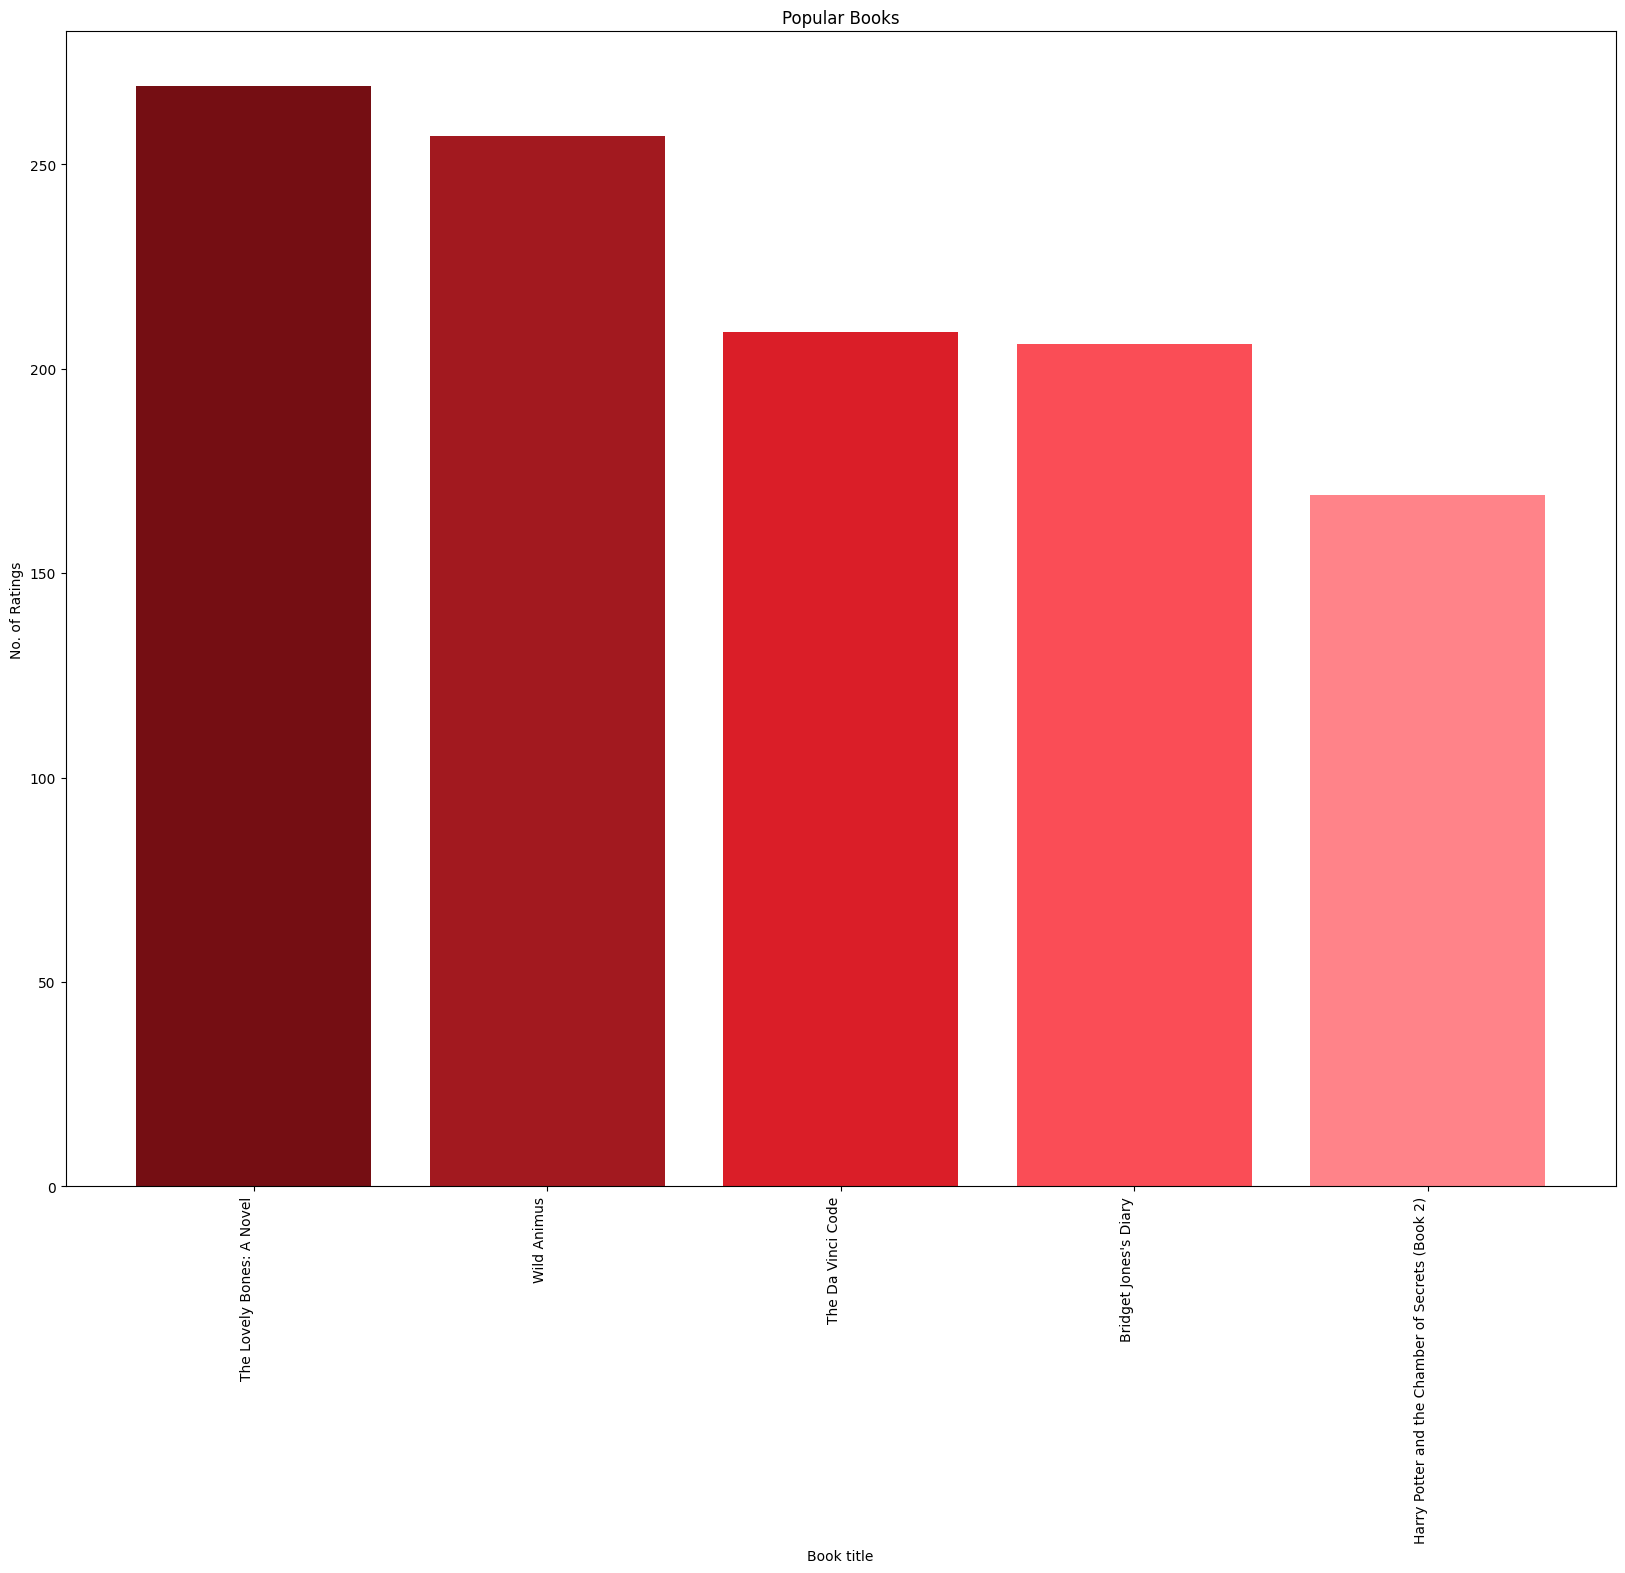

In [ ]:
h=data_age1_count
x=data_age1_name

ax = plt.subplot()
plt.bar(x,height=h,color=c)
plt.title('Popular Books')
plt.xlabel('Book title')
plt.ylabel('No. of Ratings')
plt.setp(ax.get_xticklabels(), rotation=90, ha='right')
plt.rcParams['figure.figsize'] = [20, 15]
#plt.savefig('PopularBooksUsa.png', bbox_inches='tight')
plt.show()

- The plot shows the top 10 books in terms of popularity for age group between 18 and 39 (young adults).

- The plot shows that 'The Lovely Bones: A Novel' is most popular in terms of popularity.

- This data is useful to sort the popular titles in terms of popularity amongst young adults. And can be futher used for comparision with the local populars for young adults. (Books that are popular in specific regions, Countries and cities.)

In [ ]:
data_Age = df2_mrg.loc[(df2_mrg.Age >=39)&(df2_mrg.Age <=60)]
data_Age

,ISBN,booktitle,bookAuthor,yearofpublication,publisher,UserID,Age,city,state,country,Rating
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,219008.0,60.0,halifax,nova scotia,canada,7.0
5,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,152827.0,40.0,ottawa,ontario,canada,7.0
6,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,35704.0,53.0,kansas city,missouri,usa,6.0
9,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,192665.0,47.0,vacaville,california,usa,8.0
10,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,197659.0,49.0,indiana,pennsylvania,usa,9.0
...,...,...,...,...,...,...,...,...,...,...,...
415275,1893699501,Missouri Madhouse (American Chillers),Johnathan Rand,2003,Audio Craft Press,269557.0,40.0,ypsilanti,michigan,usa,9.0
415276,1893699560,Dangerous Dolls of Delaware (American Chillers),Johnathan Rand,2003,Audio Craft Pr Inc,269557.0,40.0,ypsilanti,michigan,usa,10.0
415304,3404204433,Am Ende des Regenbogens.,Alan Dean Foster,2002,LÃ?Â¼bbe,271836.0,54.0,leipheim,bayern,germany,8.0
415331,0395264707,Dreamsnake,Vonda N. McIntyre,1978,Houghton Mifflin,275318.0,49.0,klamath falls,oregon,usa,10.0


In [ ]:
data_age1_count = data_Age['booktitle'].value_counts()[:5].tolist()
data_age1_count
data_age1_name = data_Age['booktitle'].value_counts()[:5].index.tolist()
data_age1_name

['The Lovely Bones: A Novel',
 'Wild Animus',
 'The Da Vinci Code',
 'The Secret Life of Bees',
 'The Five People You Meet in Heaven']

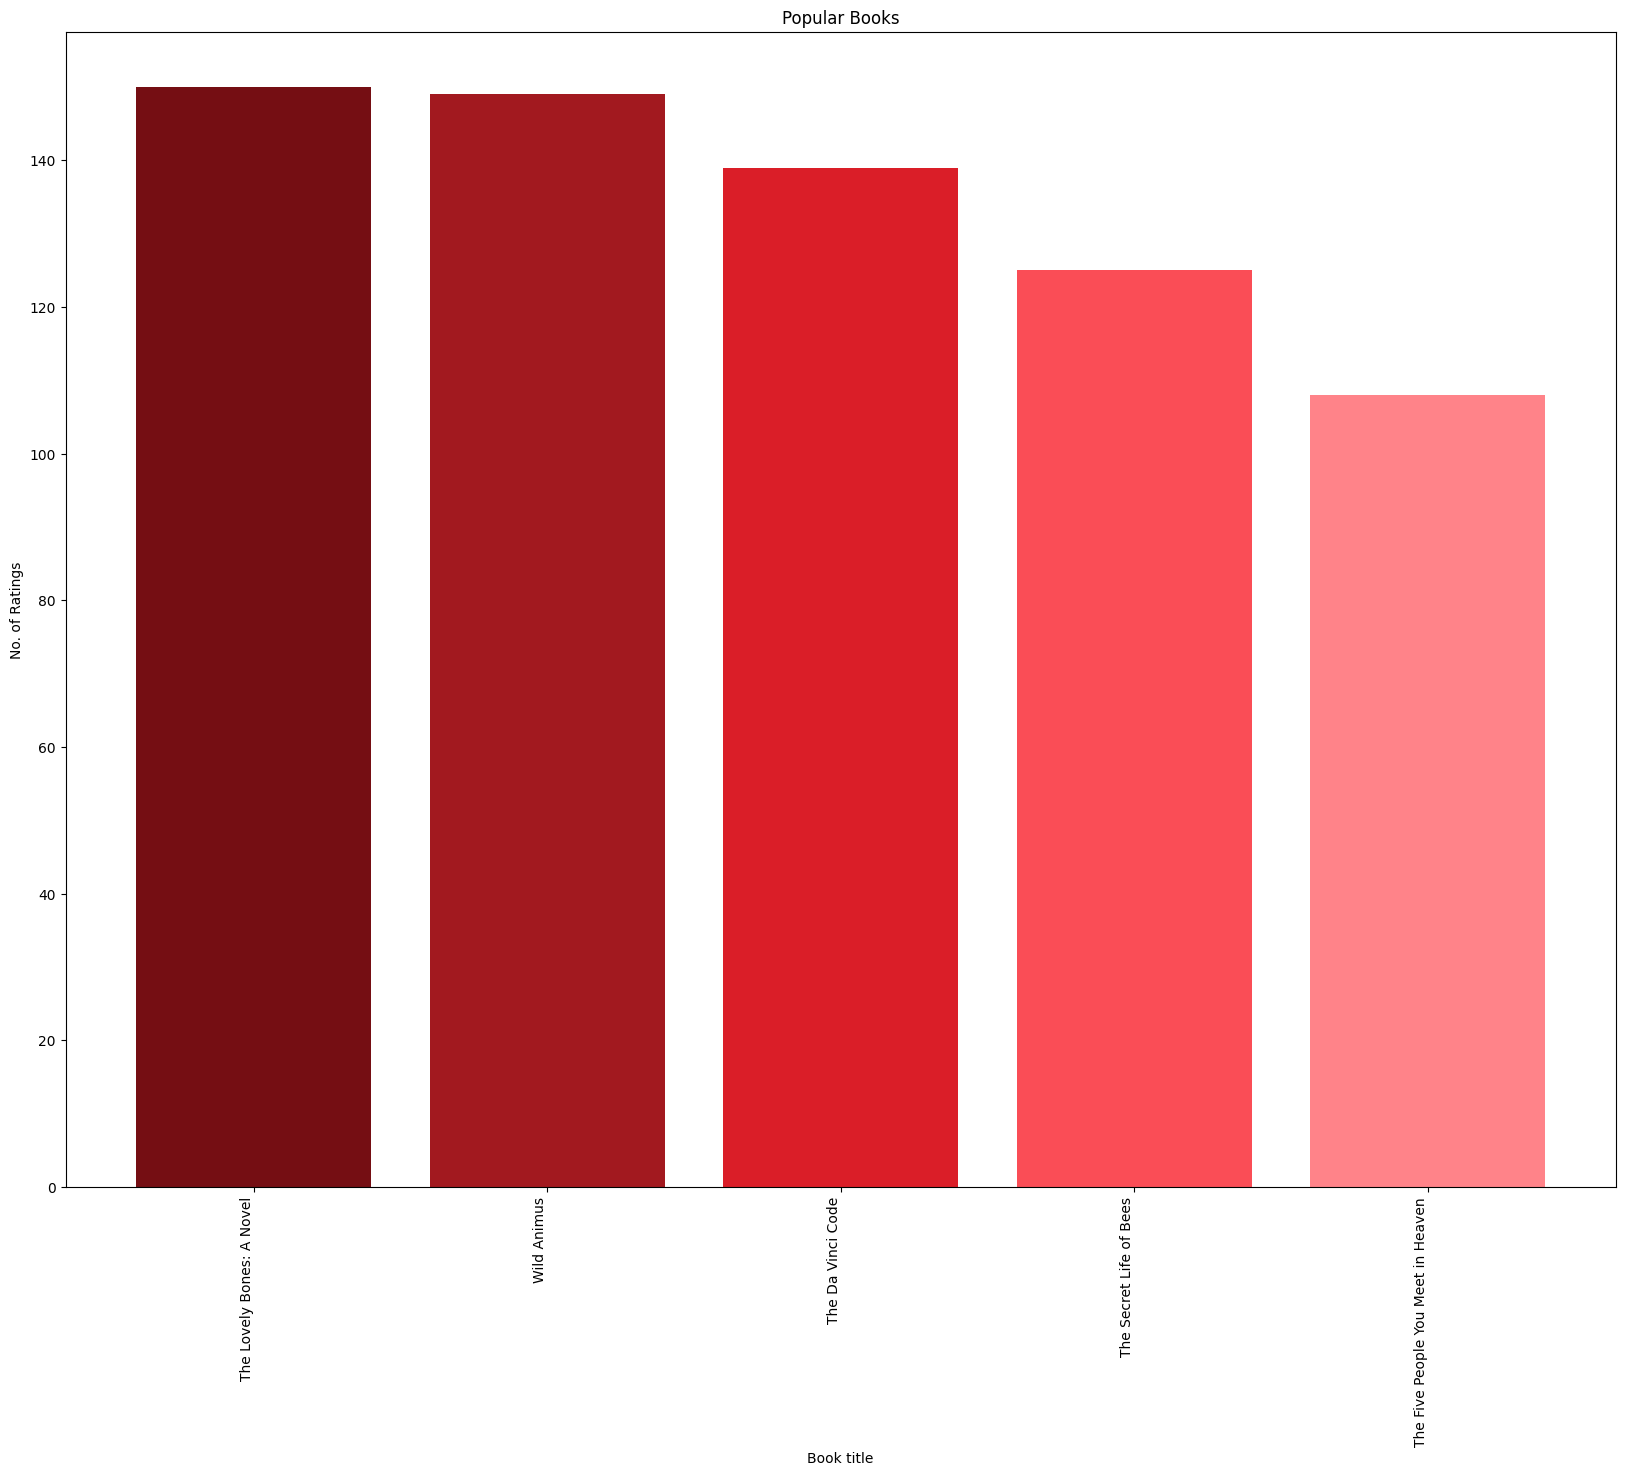

In [ ]:
h=data_age1_count
x=data_age1_name

ax = plt.subplot()
plt.bar(x,height=h,color=c)
plt.title('Popular Books')
plt.xlabel('Book title')
plt.ylabel('No. of Ratings')
plt.setp(ax.get_xticklabels(), rotation=90, ha='right')
plt.rcParams['figure.figsize'] = [20, 15]
#plt.savefig('PopularBooksUsa.png', bbox_inches='tight')
plt.show()

- The plot shows the top 10 books in terms of popularity for age group between 39 and 60 (middle-aged adults).

- The plot shows that 'The Lovely Bones: A Novel' is most popular in terms of popularity.

- This data is useful to sort the popular titles in terms of popularity amongst middle-aged adults. And can be futher used for comparision with the local populars for middle-aged adults. (Books that are popular in specific regions, Countries and cities.)

In [ ]:
data_Age = df2_mrg.loc[(df2_mrg.Age > 60)]
data_Age

,ISBN,booktitle,bookAuthor,yearofpublication,publisher,UserID,Age,city,state,country,Rating
4,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,2954.0,71.0,wichita,kansas,usa,8.0
39,0440234743,The Testament,John Grisham,1999,Dell,31299.0,74.0,homer city,pennsylvania,usa,10.0
41,0440234743,The Testament,John Grisham,1999,Dell,38991.0,68.0,cumby,texas,usa,8.0
53,0440234743,The Testament,John Grisham,1999,Dell,68537.0,70.0,friendswood,texas,usa,10.0
81,0440234743,The Testament,John Grisham,1999,Dell,151063.0,70.0,san antonio,texas,usa,10.0
...,...,...,...,...,...,...,...,...,...,...,...
414364,0452263123,The King of the Fields,Isaac Bashevis Singer,1989,Penguin USA,243574.0,61.0,anchorage,alaska,usa,8.0
414409,0802140505,The Everlasting Stream: A True Story of Rabbit...,Walt Harrington,2004,Grove Press,243757.0,61.0,sidney,illinois,usa,8.0
414435,044661422X,Last Lessons of Summer,Margaret Maron,2004,Warner Books,243929.0,63.0,chicago,illinois,,6.0
414915,1400061733,Now Is the Time to Open Your Heart : A Novel (...,ALICE WALKER,2004,Random House,248221.0,62.0,portland,oregon,usa,8.0


In [ ]:
data_age1_count = data_Age['booktitle'].value_counts()[:5].tolist()
data_age1_count
data_age1_name = data_Age['booktitle'].value_counts()[:5].index.tolist()
data_age1_name

['The Da Vinci Code',
 'The Summons',
 'Wild Animus',
 'The Lovely Bones: A Novel',
 'When the Wind Blows']

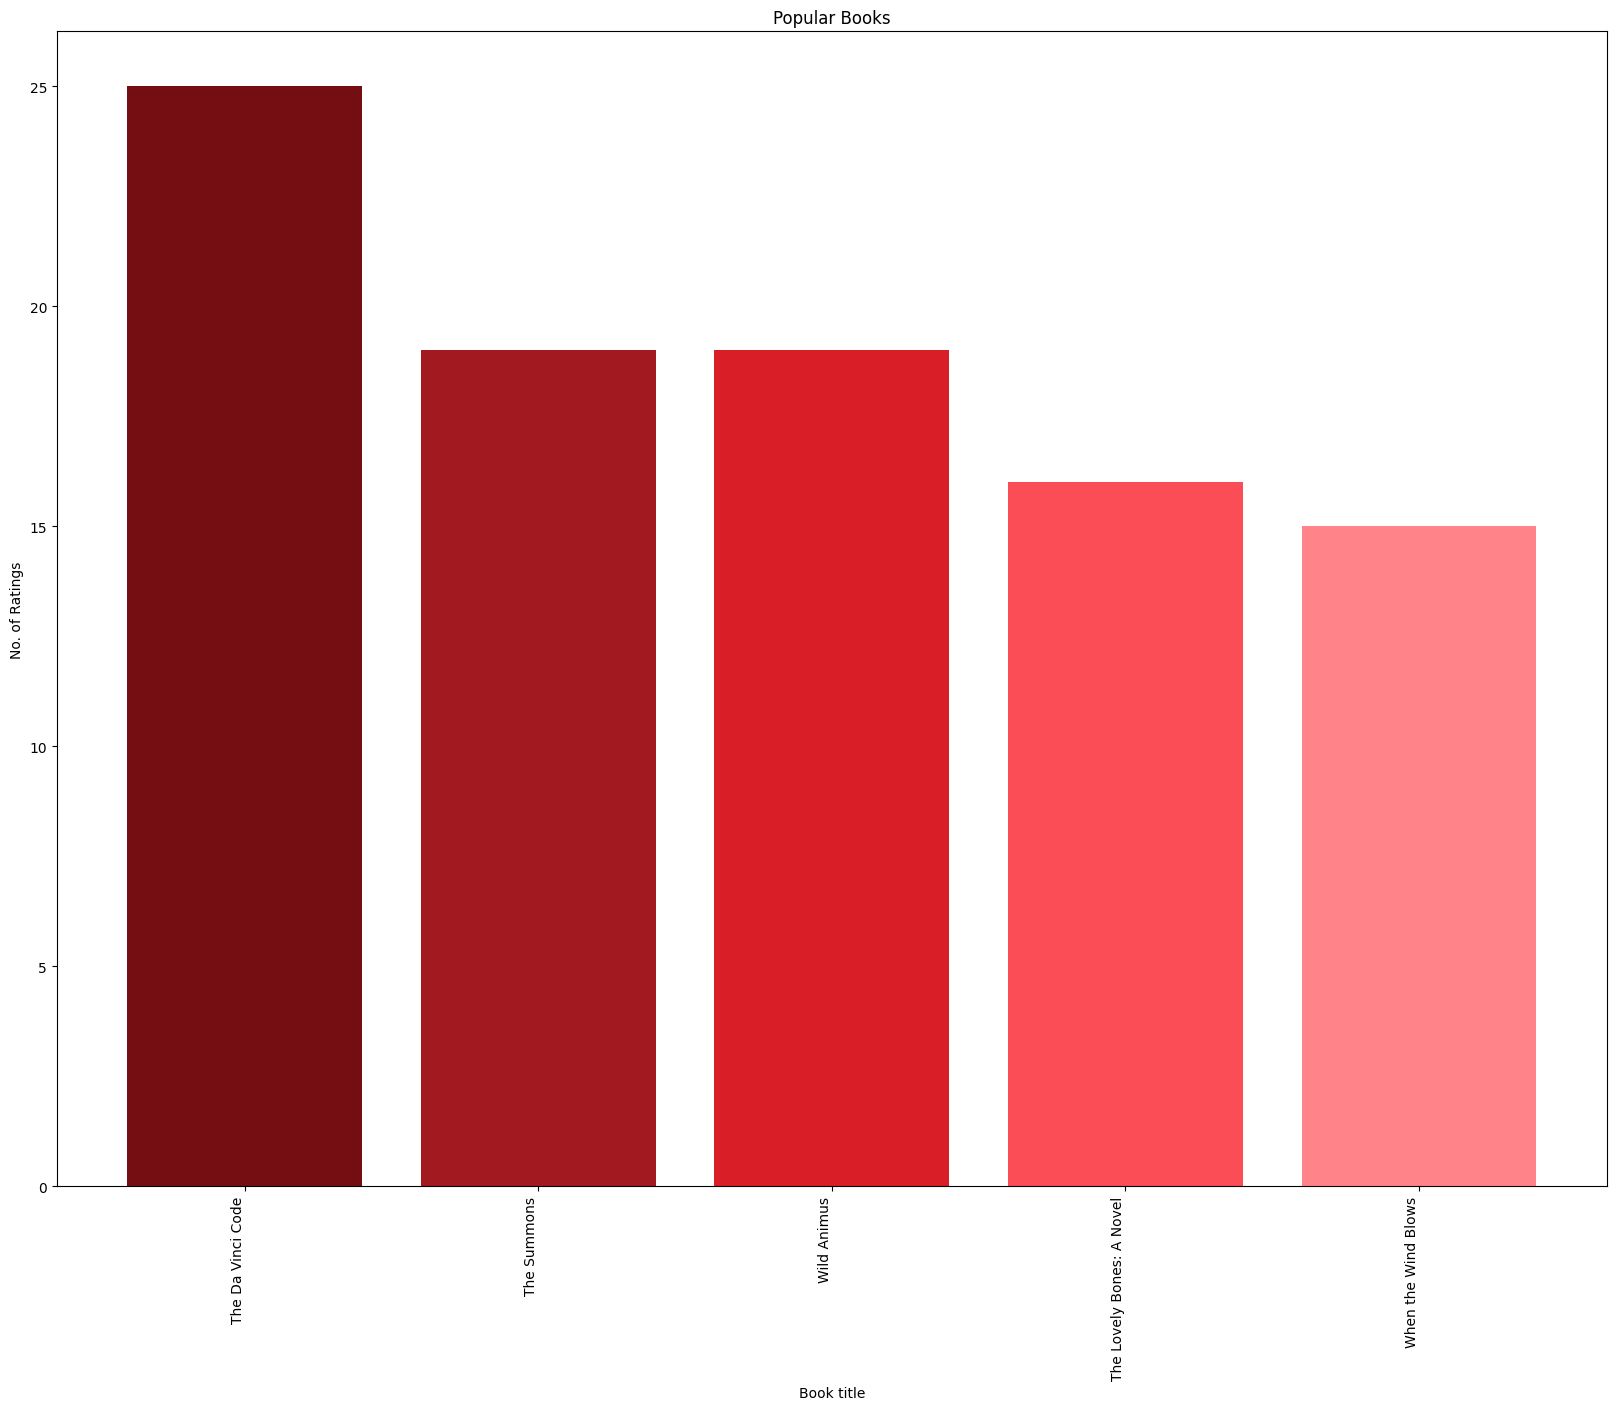

In [ ]:
h=data_age1_count
x=data_age1_name

ax = plt.subplot()
plt.bar(x,height=h,color=c)
plt.title('Popular Books')
plt.xlabel('Book title')
plt.ylabel('No. of Ratings')
plt.setp(ax.get_xticklabels(), rotation=90, ha='right')
plt.rcParams['figure.figsize'] = [20, 15]
#plt.savefig('PopularBooksUsa.png', bbox_inches='tight')
plt.show()

- The plot shows the top 10 books in terms of popularity for age group above 60 (senior citizens).

- The plot shows that 'The Lovely Bones: A Novel' is most popular in terms of popularity.

- This data is useful to sort the popular titles in terms of popularity amongst senior citizens. And can be futher used for comparision with the local populars for senior citizens. (Books that are popular in specific regions, Countries and cities.)

#Visualization Based on Location

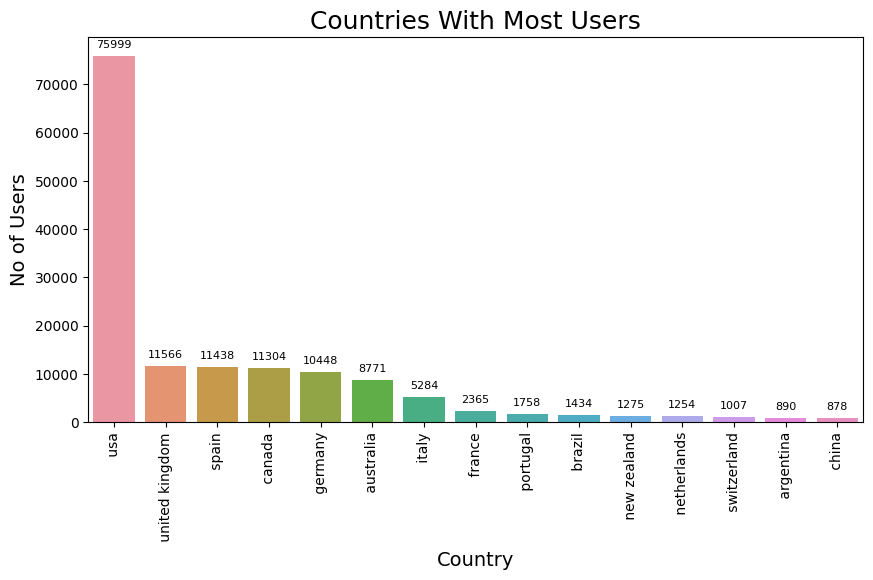

In [ ]:
my_dict=(users['country'].value_counts()).to_dict()
count= pd.DataFrame(list(my_dict.items()),columns = ['c','count'])
f = count.sort_values(by=['count'], ascending = False)
f = f.head(15)
#f.drop(7,inplace=True)
fig=plt.figure(figsize=(10,5))
ax = sns.barplot(y = 'count',x= 'c' , data = f)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90,horizontalalignment='center')
for bar in ax.patches: 
    ax.annotate(format(bar.get_height(), '.0f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=8, xytext=(0,8), 
                   textcoords='offset points') 
plt.xlabel("Country", size=14)
plt.ylabel("No of Users", size=14)
plt.title("Countries With Most Users", size=18)
plt.show()

- This data shows the countries with most number of users.

- USA has most number of users.

- This data can be used to target sales in a specific country.

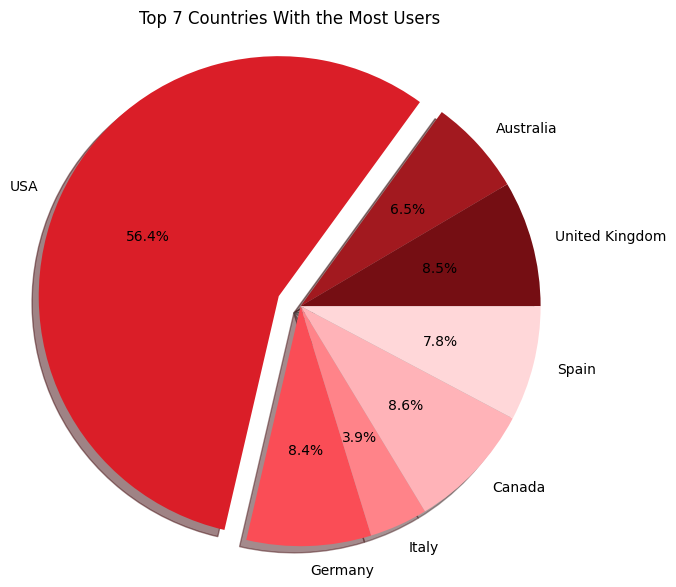

In [ ]:
my_dict=(users['country'].value_counts()).to_dict()
count= pd.DataFrame(list(my_dict.items()),columns = ['c','count'])
a = count.sort_values(by=['count'], ascending = False)
a.head(7)
labels = 'United Kingdom','Australia','USA','Germany','Italy','Canada','Spain'
sizes = [count['count'].iloc[2],count['count'].iloc[5],count['count'].iloc[0],count['count'].iloc[3],count['count'].iloc[6],
         count['count'].iloc[1],count['count'].iloc[4]]
explode = (0, 0, 0.1, 0,0, 0,0)

fig1 , ax1 = plt.subplots(figsize=(7,7))

ax1.pie(sizes,
        explode = explode,
        labels = labels,
        colors=c,
        autopct = '%1.1f%%',
        shadow = True,
        startangle = 0)
plt.title("Top 7 Countries With the Most Users")
ax1.axis ('equal')
plt.savefig('TopCountries.png', bbox_inches='tight')
plt.show()

- This data shows the countries with most number of users.

- USA has most number of users i.e. 56.3%

- This data can be used to target sales in a specific country.

In [ ]:
books.head()
#rating
#users

,ISBN,booktitle,bookAuthor,yearofpublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [ ]:
rating.head()

,UserID,ISBN,Rating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
6,276736,3257224281,8
7,276737,0600570967,6


In [ ]:
users.head()

,UserID,Age,city,state,country
1,2,18.0,stockton,california,usa
3,4,17.0,porto,v.n.gaia,portugal
5,6,61.0,santa monica,california,usa
9,10,26.0,albacete,wisconsin,spain
10,11,14.0,melbourne,victoria,australia


#Usa

In [ ]:
data1 = df2_mrg.loc[df2_mrg['country']==' usa']
data1=pd.DataFrame(data1)
data1

,ISBN,booktitle,bookAuthor,yearofpublication,publisher,UserID,Age,city,state,country,Rating
4,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,2954.0,71.0,wichita,kansas,usa,8.0
6,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,35704.0,53.0,kansas city,missouri,usa,6.0
7,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,110912.0,36.0,milpitas,california,usa,10.0
8,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,157969.0,30.0,denver,colorado,usa,8.0
9,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,192665.0,47.0,vacaville,california,usa,8.0
...,...,...,...,...,...,...,...,...,...,...,...
415331,0395264707,Dreamsnake,Vonda N. McIntyre,1978,Houghton Mifflin,275318.0,49.0,klamath falls,oregon,usa,10.0
415337,1845170423,Cocktail Classics,David Biggs,2004,Connaught,275970.0,46.0,pittsburgh,pennsylvania,usa,7.0
415339,0449906736,Flashpoints: Promise and Peril in a New World,Robin Wright,1993,Ballantine Books,276313.0,36.0,livermore,california,usa,5.0
415340,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),276463.0,26.0,providence,rhode island,usa,7.0


In [ ]:
data1_count=data1['booktitle'].value_counts()[:5].tolist()
data1_count
data1_names=data1['booktitle'].value_counts()[:5].index
data1_names

TopBooksUsa = pd.DataFrame(data1_names,columns=['BookTitle'])
TopBooksUsa['Sales'] = data1_count
TopBooksUsa

,BookTitle,Sales
0,The Lovely Bones: A Novel,339
1,The Da Vinci Code,301
2,The Secret Life of Bees,247
3,Wild Animus,233
4,Angels & Demons,214


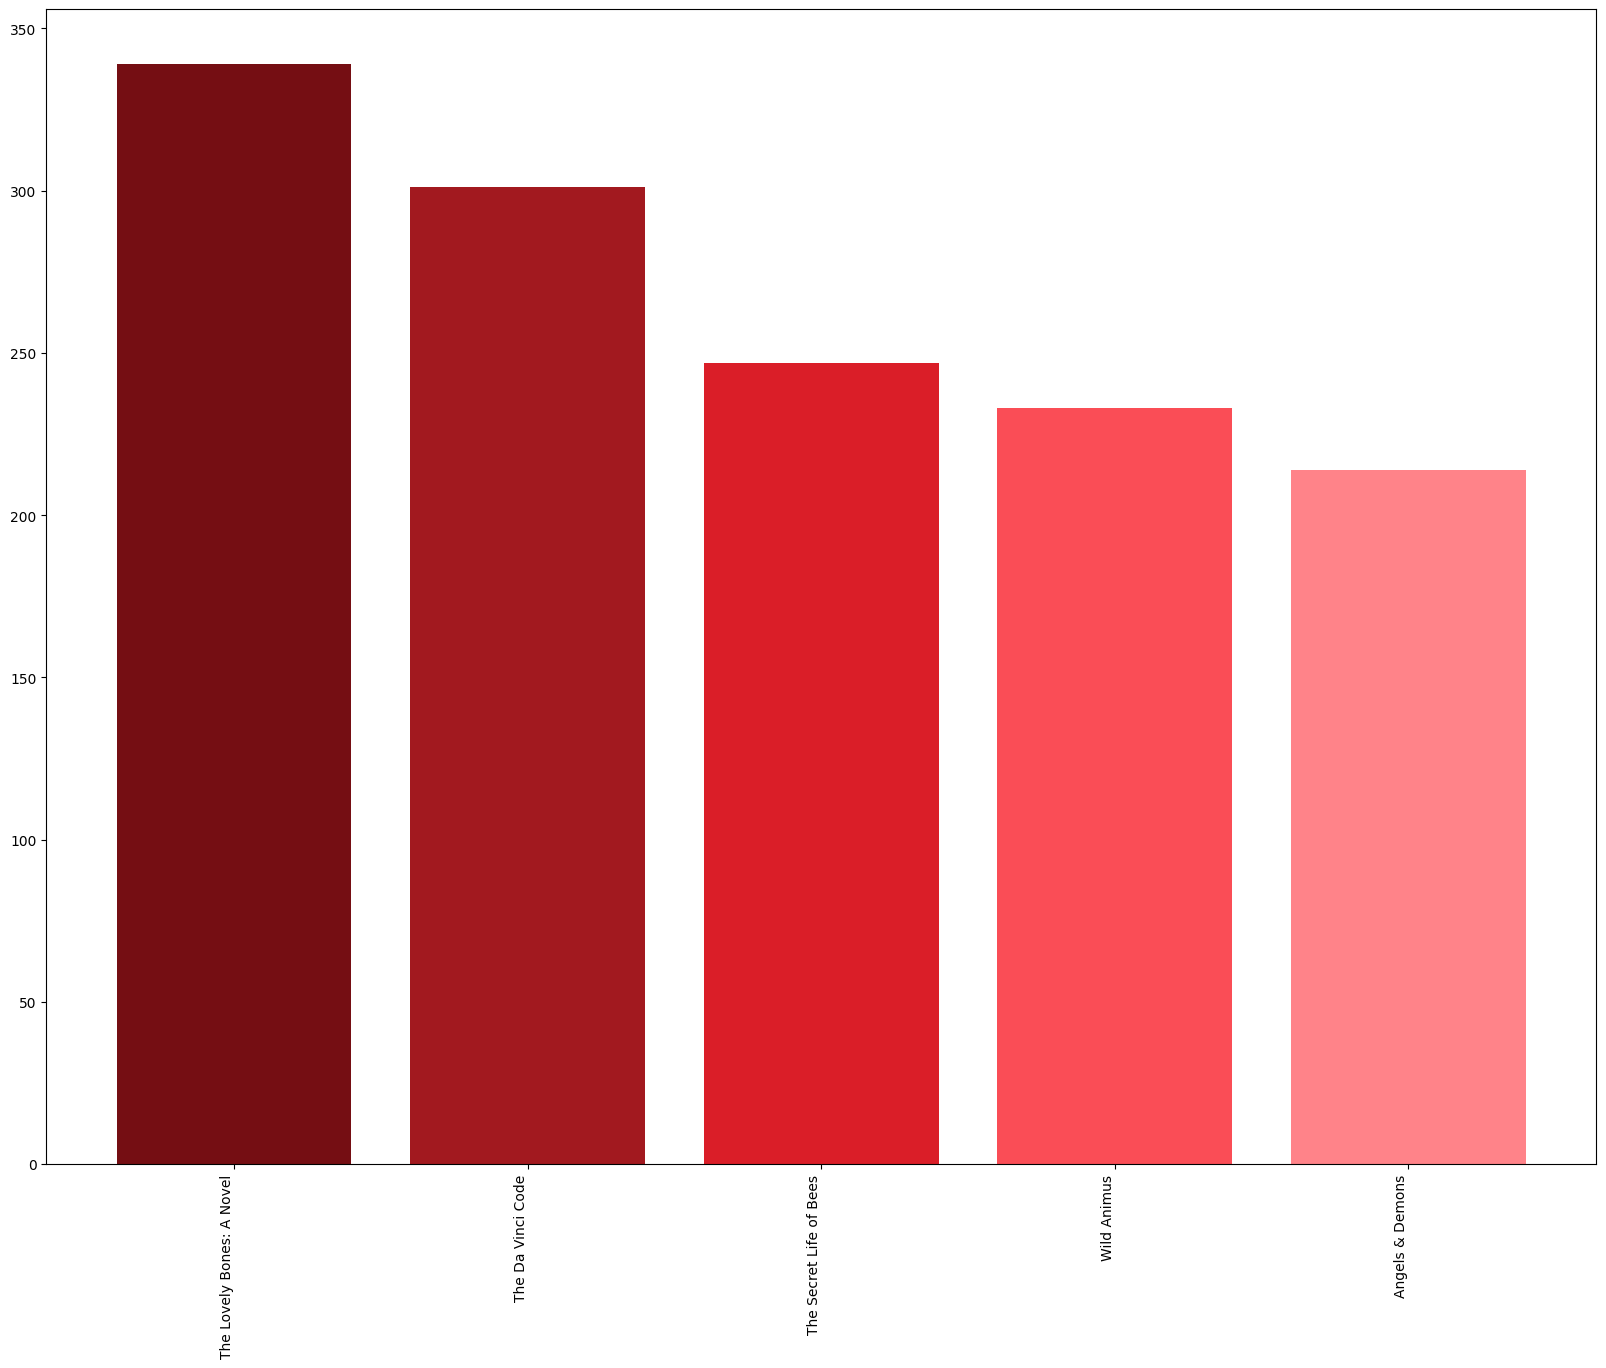

In [ ]:
x=data1_names
h=data1_count

ax = plt.subplot()
plt.bar(x,height=h,color=c)
plt.setp(ax.get_xticklabels(), rotation=90, ha='right')
plt.rcParams['figure.figsize'] = [20, 10]
plt.savefig('PopularBooksUsa.png', bbox_inches='tight')
plt.show()

In [ ]:
Top_cities_count = data1['city'].value_counts()[:5].tolist()
Top_cities_name=data1['city'].value_counts()[:5].index.tolist()
Top_cities_name

['morrow', 'chicago', 'seattle', 'portland', 'ft. stewart']

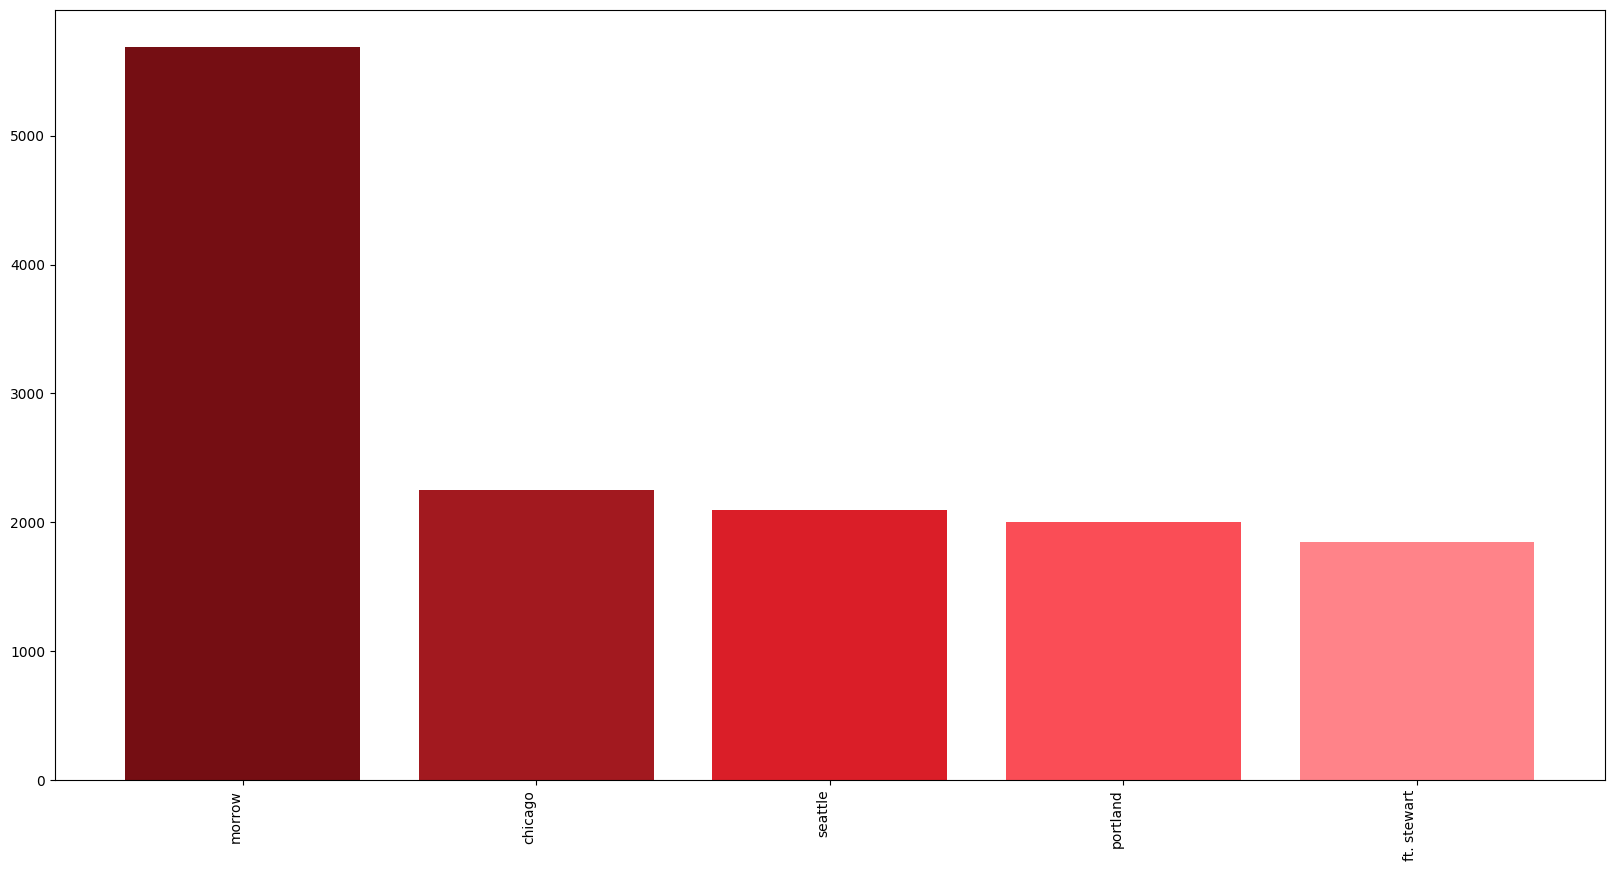

In [ ]:
x=Top_cities_name
h=Top_cities_count

ax = plt.subplot()
plt.bar(x,height=h,color=c)
plt.setp(ax.get_xticklabels(), rotation=90, ha='right')
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

In [ ]:
data_city = df2_mrg.loc[df2_mrg['city']=='morrow']
data_city

,ISBN,booktitle,bookAuthor,yearofpublication,publisher,UserID,Age,city,state,country,Rating
1177,042518630X,Purity in Death,J.D. Robb,2002,Berkley Publishing Group,98391.0,52.0,morrow,georgia,usa,9.0
1505,0060938412,The Accidental Virgin,Valerie Frankel,2003,Avon Trade,98391.0,52.0,morrow,georgia,usa,9.0
2015,0312252617,Fast Women,Jennifer Crusie,2001,St. Martin's Press,98391.0,52.0,morrow,georgia,usa,10.0
2221,0786868716,The Five People You Meet in Heaven,Mitch Albom,2003,Hyperion,98391.0,52.0,morrow,georgia,usa,10.0
3115,0451410319,Hush,Anne Frasier,2002,Onyx Books,98391.0,52.0,morrow,georgia,usa,9.0
...,...,...,...,...,...,...,...,...,...,...,...
394618,1594140960,Eye Of Newt (Five Star First Edition Mystery S...,Denise Dietz,2004,Five Star (ME),98391.0,52.0,morrow,georgia,usa,10.0
394619,1594141797,Heist and Seek,Amy Sandrin,2004,Five Star (ME),98391.0,52.0,morrow,georgia,usa,10.0
394620,1594141932,The Deadly Garden Tour (Five Star First Editio...,Kathleen Gregory Klein,2004,Five Star (ME),98391.0,52.0,morrow,georgia,usa,10.0
394622,1594142157,World-walker,Melisa C. Michaels,2004,Five Star (ME),98391.0,52.0,morrow,georgia,usa,10.0


#Outlier detection and cleaning

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Files/Data_Clean1.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df.head()

,ISBN,booktitle,bookAuthor,yearofpublication,publisher,UserID,Age,city,state,country,Rating
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,67544.0,30.0,toronto,ontario,canada,8.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,219008.0,60.0,halifax,nova scotia,canada,7.0
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,263325.0,27.0,fredericton,new brunswick,canada,6.0
3,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,2954.0,71.0,wichita,kansas,usa,8.0
4,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,152827.0,40.0,ottawa,ontario,canada,7.0


<Axes: >

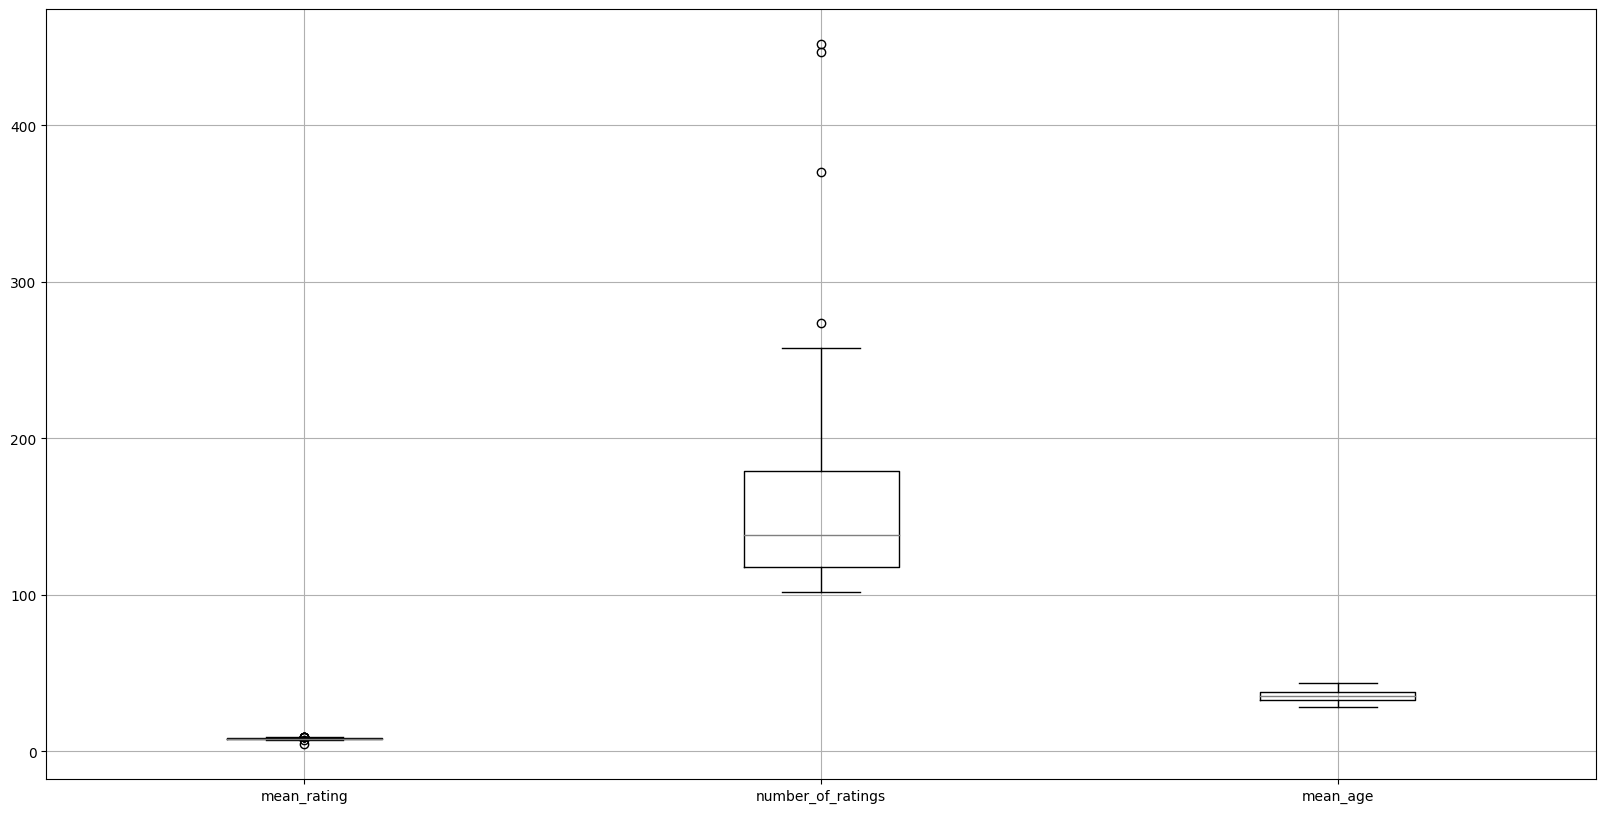

In [ ]:
# Aggregate by books
agg_ratings = df.groupby('booktitle').agg(mean_rating = ('Rating','mean'),
                                          number_of_ratings = ('Rating','count'),
                                          mean_age = ('Age','mean')).reset_index()
        
# Keep the books with over 100 ratings
agg_ratings_GT100 = agg_ratings[agg_ratings['number_of_ratings']>100]
agg_ratings_GT100.boxplot()

In [ ]:
Q1 = agg_ratings_GT100['number_of_ratings'].quantile(0.25)
Q3 = agg_ratings_GT100['number_of_ratings'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
upper_fence = Q3 + (whisker_width*IQR)
lower_fence = Q1 - (whisker_width*IQR)

Outlier = agg_ratings_GT100[(agg_ratings_GT100.number_of_ratings > Q3 + (whisker_width*IQR)) | (agg_ratings_GT100.number_of_ratings < Q1 - (whisker_width*IQR))]
Outlier

,booktitle,mean_rating,number_of_ratings,mean_age
81031,The Da Vinci Code,8.418919,370,38.816216
87039,The Lovely Bones: A Novel,8.238938,452,35.836283
91707,The Secret Life of Bees,8.470803,274,39.456204
104321,Wild Animus,4.501119,447,36.069351


In [ ]:
for x in ['number_of_ratings']:
    q3,q1 = np.percentile(agg_ratings_GT100.loc[:,x],[75,25])
    intr_qr = q3-q1

    max = q3+(1.5*intr_qr)
    min = q1-(1.5*intr_qr)

    agg_ratings_GT100.loc[agg_ratings_GT100[x] < min,x] = np.nan
    agg_ratings_GT100.loc[agg_ratings_GT100[x] > max,x] = np.nan

In [ ]:
Q1 = agg_ratings_GT100['mean_rating'].quantile(0.25)
Q3 = agg_ratings_GT100['mean_rating'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
upper_fence = Q3 + (whisker_width*IQR)
lower_fence = Q1 - (whisker_width*IQR)

Outlier = agg_ratings_GT100[(agg_ratings_GT100.mean_rating > Q3 + (whisker_width*IQR)) | (agg_ratings_GT100.mean_rating < Q1 - (whisker_width*IQR))]
Outlier

,booktitle,mean_rating,number_of_ratings,mean_age
35782,Harry Potter and the Goblet of Fire (Book 4),9.224044,183.0,29.169399
35786,Harry Potter and the Order of the Phoenix (Boo...,9.107345,177.0,31.322034
35793,Harry Potter and the Prisoner of Azkaban (Book 3),9.168269,208.0,30.543269
35800,Harry Potter and the Sorcerer's Stone (Book 1),9.191176,136.0,31.382353
82861,The Fellowship of the Ring (The Lord of the Ri...,9.033784,148.0,30.222973
83724,The Girls' Guide to Hunting and Fishing,6.828221,163.0,32.509202
93986,"The Two Towers (The Lord of the Rings, Part 2)",9.365385,104.0,30.673077
104321,Wild Animus,4.501119,NaN,36.069351


In [ ]:
for x in ['mean_rating']:
    q3,q1 = np.percentile(agg_ratings_GT100.loc[:,x],[75,25])
    intr_qr = q3-q1

    max = q3+(1.5*intr_qr)
    min = q1-(1.5*intr_qr)

    agg_ratings_GT100.loc[agg_ratings_GT100[x] < min,x] = np.nan
    agg_ratings_GT100.loc[agg_ratings_GT100[x] > max,x] = np.nan

In [ ]:
agg_ratings_GT100.isnull().sum()

booktitle            0
mean_rating          8
number_of_ratings    4
mean_age             0
dtype: int64

In [ ]:
agg_ratings_GT100=agg_ratings_GT100.dropna()

<Axes: >

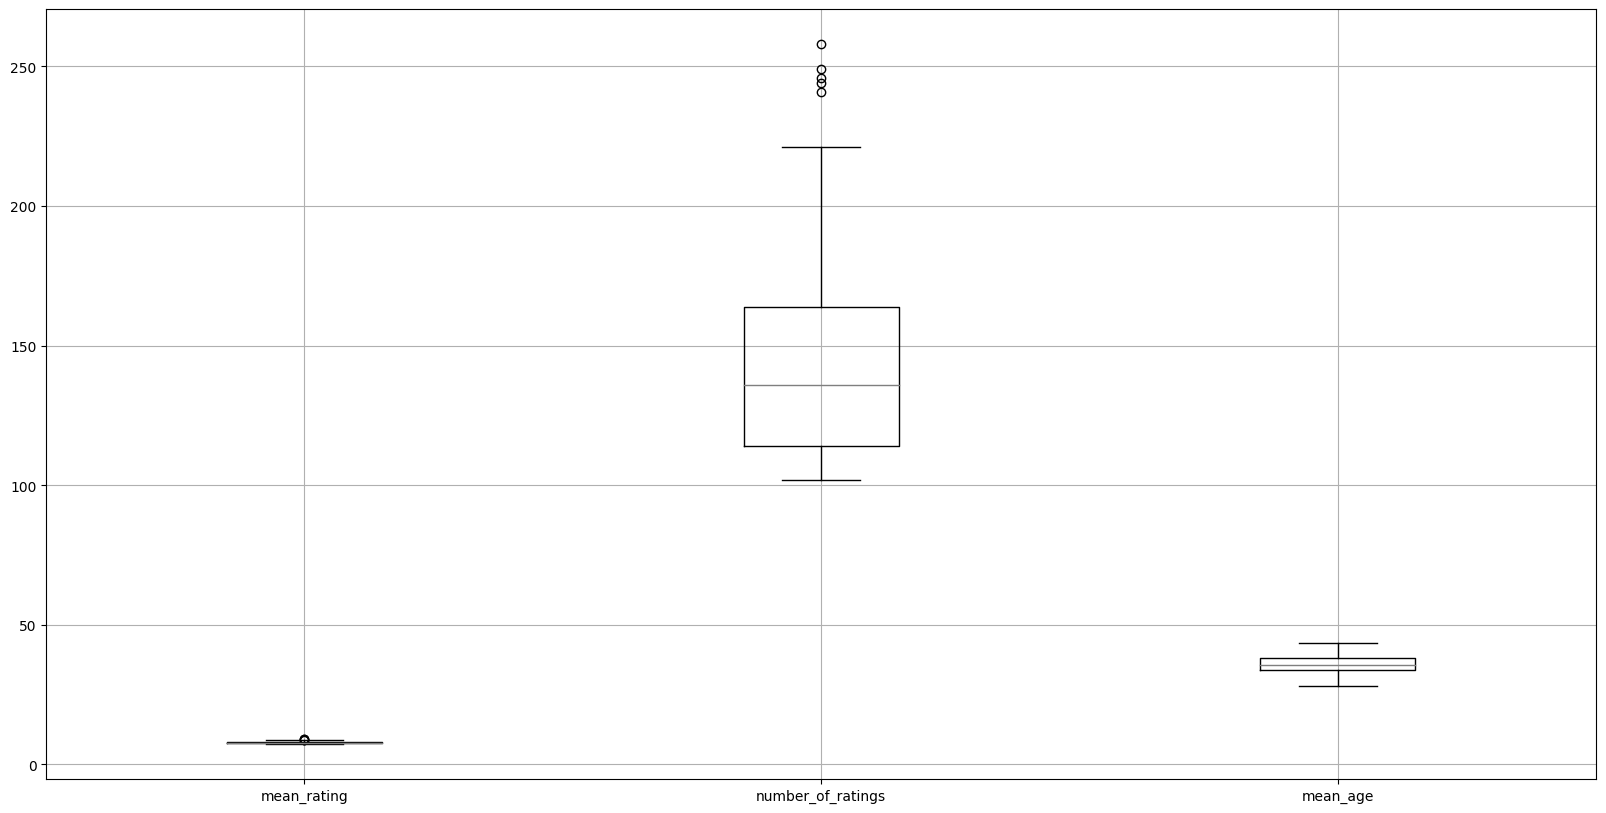

In [ ]:
agg_ratings_GT100.boxplot()

In [ ]:
agg_ratings_GT100

,booktitle,mean_rating,number_of_ratings,mean_age
360,1984,8.801724,116.0,28.577586
382,1st to Die: A Novel,7.789116,147.0,39.741497
2449,A Painted House,7.636816,201.0,40.611940
2620,A Prayer for Owen Meany,8.527778,108.0,34.601852
3227,A Time to Kill,8.110345,145.0,35.427586
...,...,...,...,...
99054,"Tuesdays with Morrie: An Old Man, a Young Man,...",8.538922,167.0,37.005988
103627,Where the Heart Is (Oprah's Book Club (Paperba...,8.237838,185.0,35.643243
103835,White Oleander : A Novel,7.631579,114.0,35.938596
103836,White Oleander : A Novel (Oprah's Book Club),8.047170,106.0,34.075472


In [ ]:
agg_ratings_GT100.to_csv('grouped_data_clean.csv', encoding='utf-8')


In [ ]:
df = df.loc[df.Rating != 0, :]

In [ ]:
df['UserID'].value_counts()

98391.0     5689
153662.0    1845
235105.0    1020
171118.0     962
16795.0      959
            ... 
135795.0       1
172788.0       1
261585.0       1
261471.0       1
259679.0       1
Name: UserID, Length: 38763, dtype: int64